In [1]:
#Import

import numpy as np
import matplotlib.pyplot as plt
from multipole_signal import Derivatives
from getdist import plots
from getdist.gaussian_mixtures import GaussianND
import fishermat as fm
import pickle as pk

#Set current directory
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd())))
sys.path.append(SCRIPT_DIR)
print(SCRIPT_DIR)

#Configuration
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          'xtick.direction': 'out',  
          'ytick.direction': 'out',  
          'xtick.minor.visible': True,  
          'ytick.minor.visible': True,
          'xtick.major.size': 9,
          'xtick.minor.size': 4.5,
          'ytick.major.size': 9,
          'ytick.minor.size': 4.5,
          'lines.linewidth': 1.75}
plt.rcParams.update(params)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/danielsb/Documents/GitHub


In [2]:
# Loading the data

# List of file names to load
file_names = ['widths_Joint_50x10.pkl', 'widths_Joint_50x20.pkl', 'widths_Joint_50x30.pkl', 'widths_Joint_50x40.pkl']

# Dictionary to store loaded data
widths_data = {}

# Loop through the file names and load each one
for file_name in file_names:
    with open(file_name, 'rb') as f:
        widths_data[file_name] = pk.load(f)

# Now 'widths_data' contains the contents of all the .pkl files

widths_data.keys()

dict_keys(['widths_Joint_50x10.pkl', 'widths_Joint_50x20.pkl', 'widths_Joint_50x30.pkl', 'widths_Joint_50x40.pkl'])

In [3]:
# Each dict has the following keys

for name in file_names:
    print(widths_data[name].keys())

dict_keys(['z', 'sB_50', 'sB_10', 'sB_Joint_50', 'sB_Joint_10', 'sM_50', 'sM_10', 'sM_Joint', 'nevol_50', 'nevol_10', 'nevol_Joint'])
dict_keys(['z', 'sB_50', 'sB_20', 'sB_Joint_50', 'sB_Joint_20', 'sM_50', 'sM_20', 'sM_Joint', 'nevol_50', 'nevol_20', 'nevol_Joint'])
dict_keys(['z', 'sB_50', 'sB_30', 'sB_Joint_50', 'sB_Joint_30', 'sM_50', 'sM_30', 'sM_Joint', 'nevol_50', 'nevol_30', 'nevol_Joint'])
dict_keys(['z', 'sB_50', 'sB_40', 'sB_Joint_50', 'sB_Joint_40', 'sM_50', 'sM_40', 'sM_Joint', 'nevol_50', 'nevol_40', 'nevol_Joint'])


# Test plots

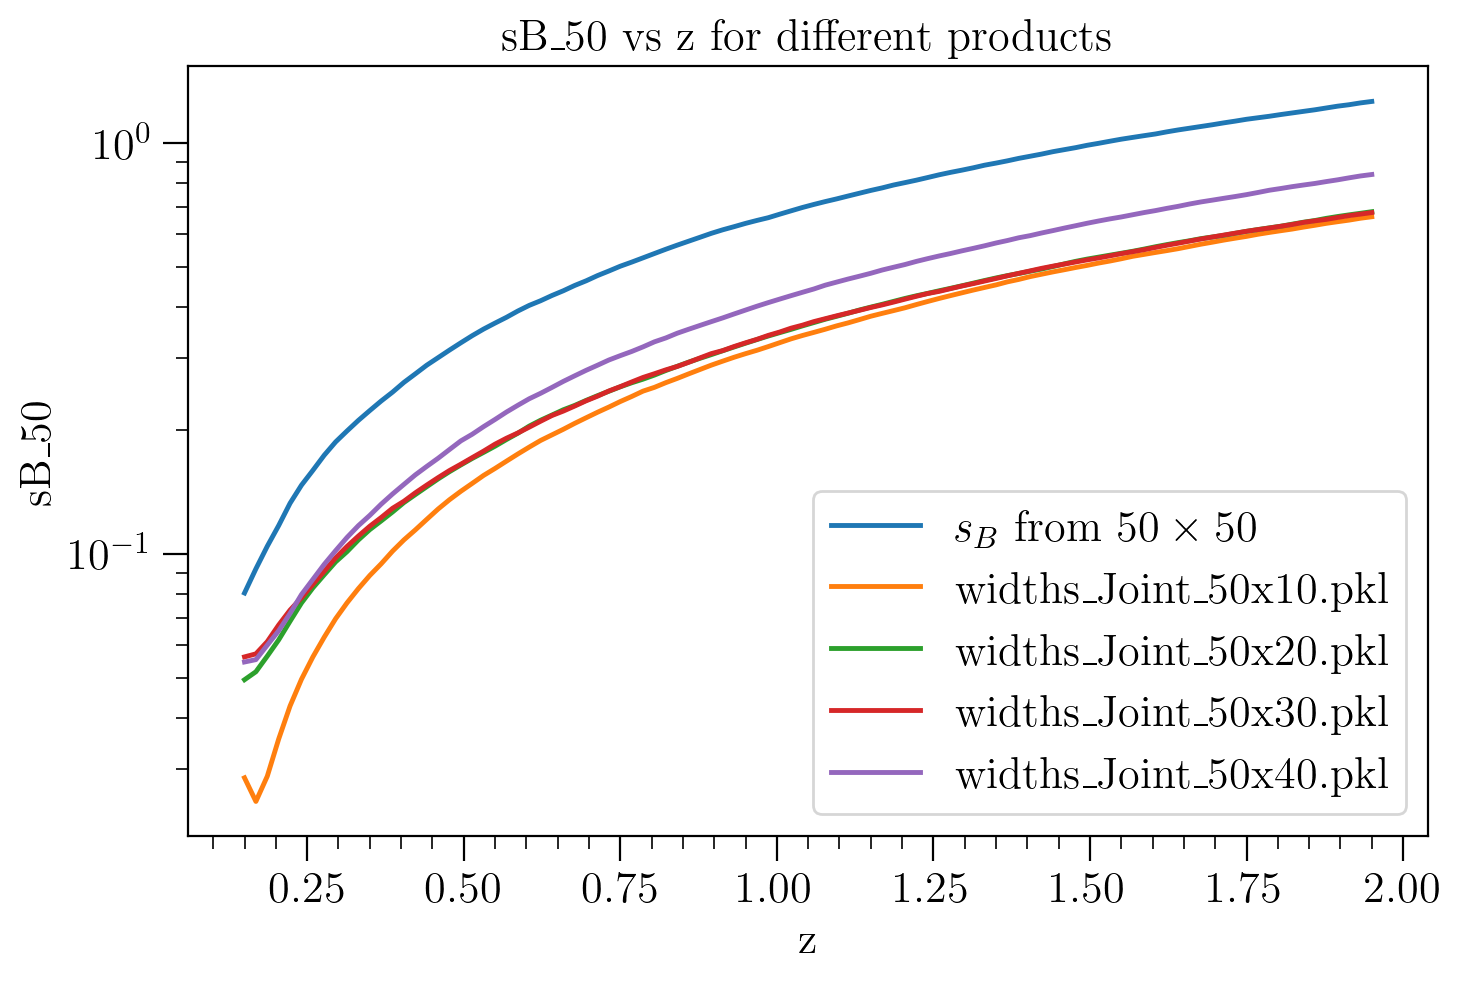

In [4]:
# Plotting 'sB_50' against 'z'

plt.figure(figsize=(8, 5))

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_50'], label='$s_B$ from $50 \\times 50$')


for file_name in file_names:
    plt.plot(widths_data[file_name]['z'], widths_data[file_name]['sB_Joint_50'], label=file_name)

plt.xlabel('z')
plt.ylabel('sB_50')
plt.legend()
plt.title('sB_50 vs z for different products')
plt.yscale('log')
plt.show()

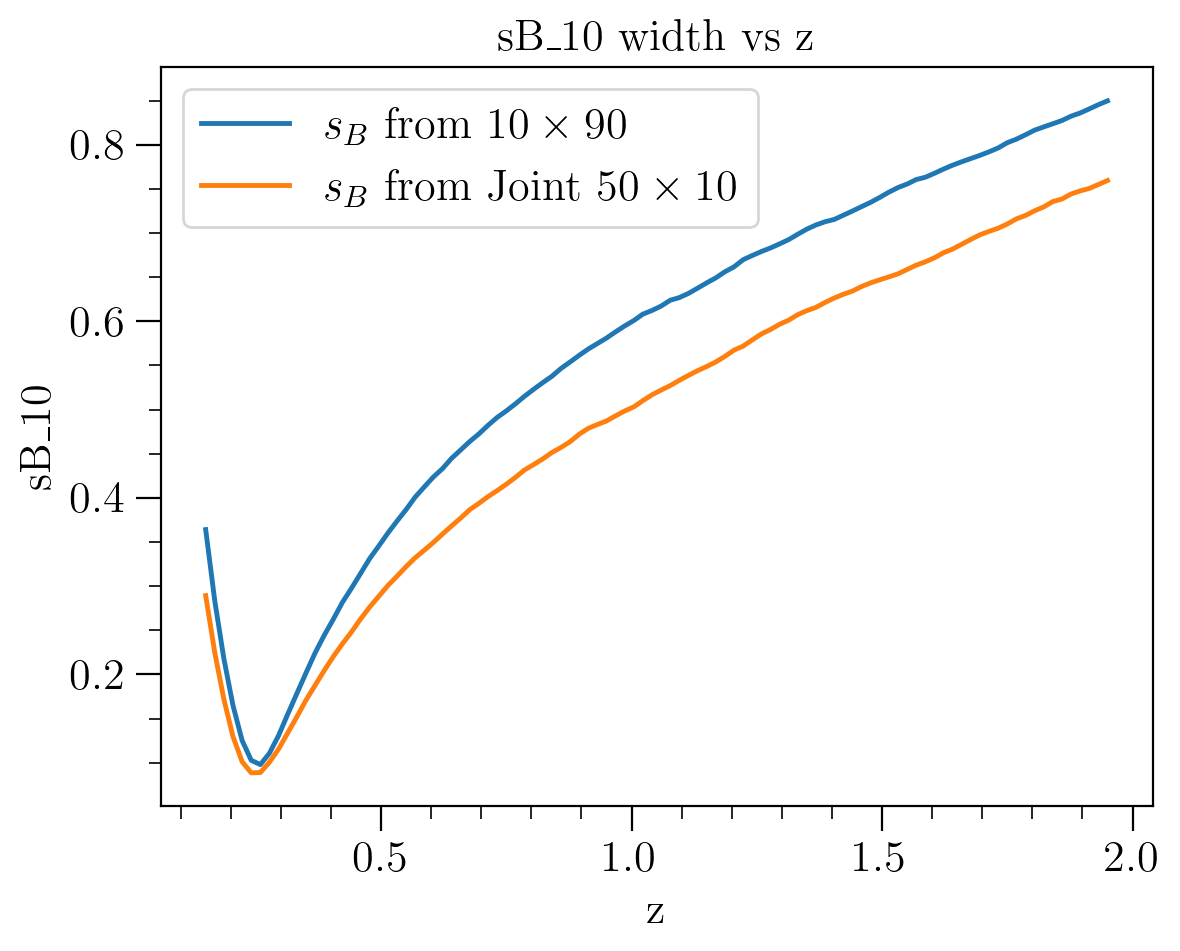

In [5]:
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_10'], label='$s_B$ from $10 \\times 90$')
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_Joint_10'], label='$s_B$ from Joint $50 \\times 10$')

plt.xlabel('z')
plt.ylabel('sB_10')
plt.legend()
plt.title('sB_10 width vs z')
#plt.yscale('log')
plt.show()


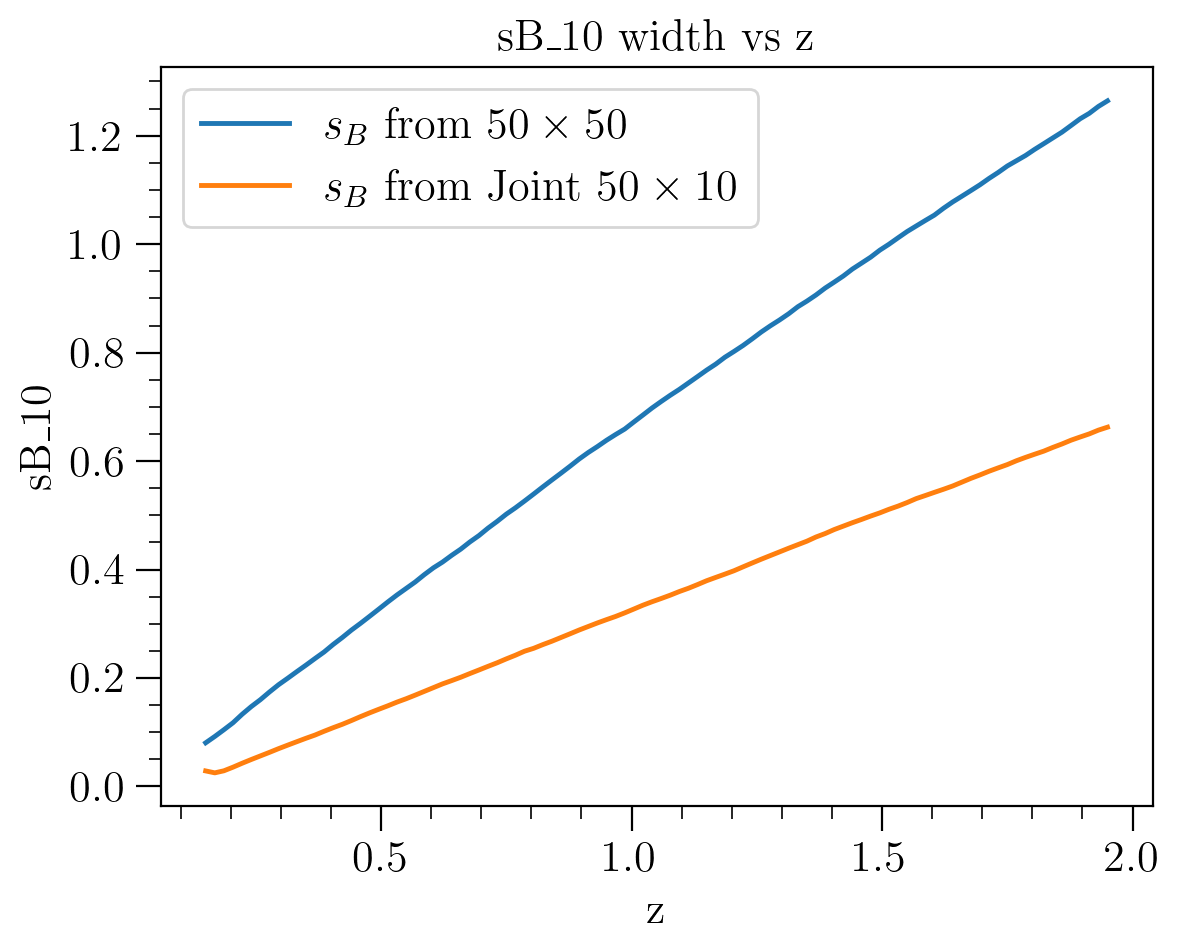

In [6]:
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_50'], label='$s_B$ from $50 \\times 50$')
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_Joint_50'], label='$s_B$ from Joint $50 \\times 10$')

plt.xlabel('z')
plt.ylabel('sB_10')
plt.legend()
plt.title('sB_10 width vs z')
#plt.yscale('log')
plt.show()

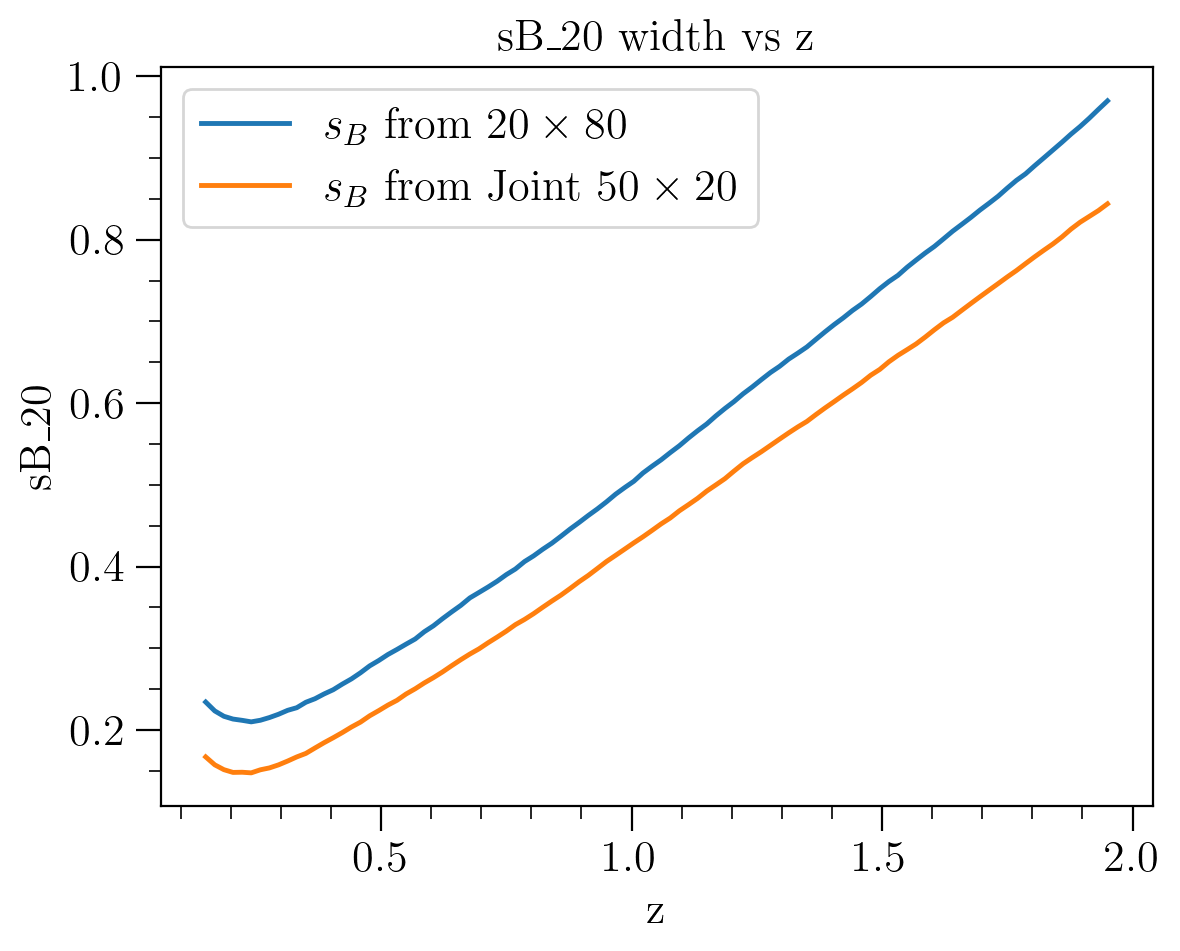

In [7]:
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sB_20'], label='$s_B$ from $20 \\times 80$')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sB_Joint_20'], label='$s_B$ from Joint $50 \\times 20$')

plt.xlabel('z')
plt.ylabel('sB_20')
plt.legend()
plt.title('sB_20 width vs z')
#plt.yscale('log')
plt.show()

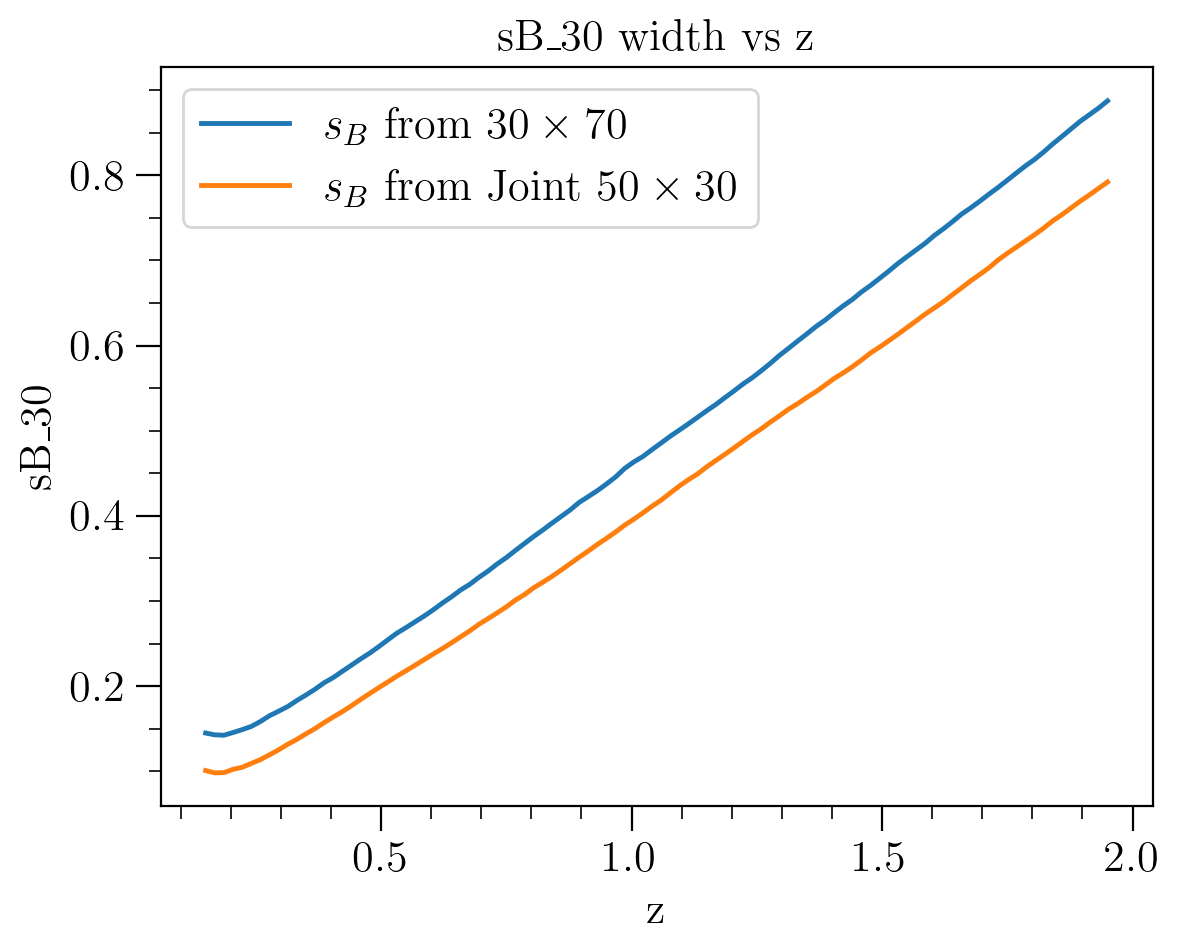

In [8]:
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sB_30'], label='$s_B$ from $30 \\times 70$')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sB_Joint_30'], label='$s_B$ from Joint $50 \\times 30$')

plt.xlabel('z')
plt.ylabel('sB_30')
plt.legend()
plt.title('sB_30 width vs z')
#plt.yscale('log')
plt.show()

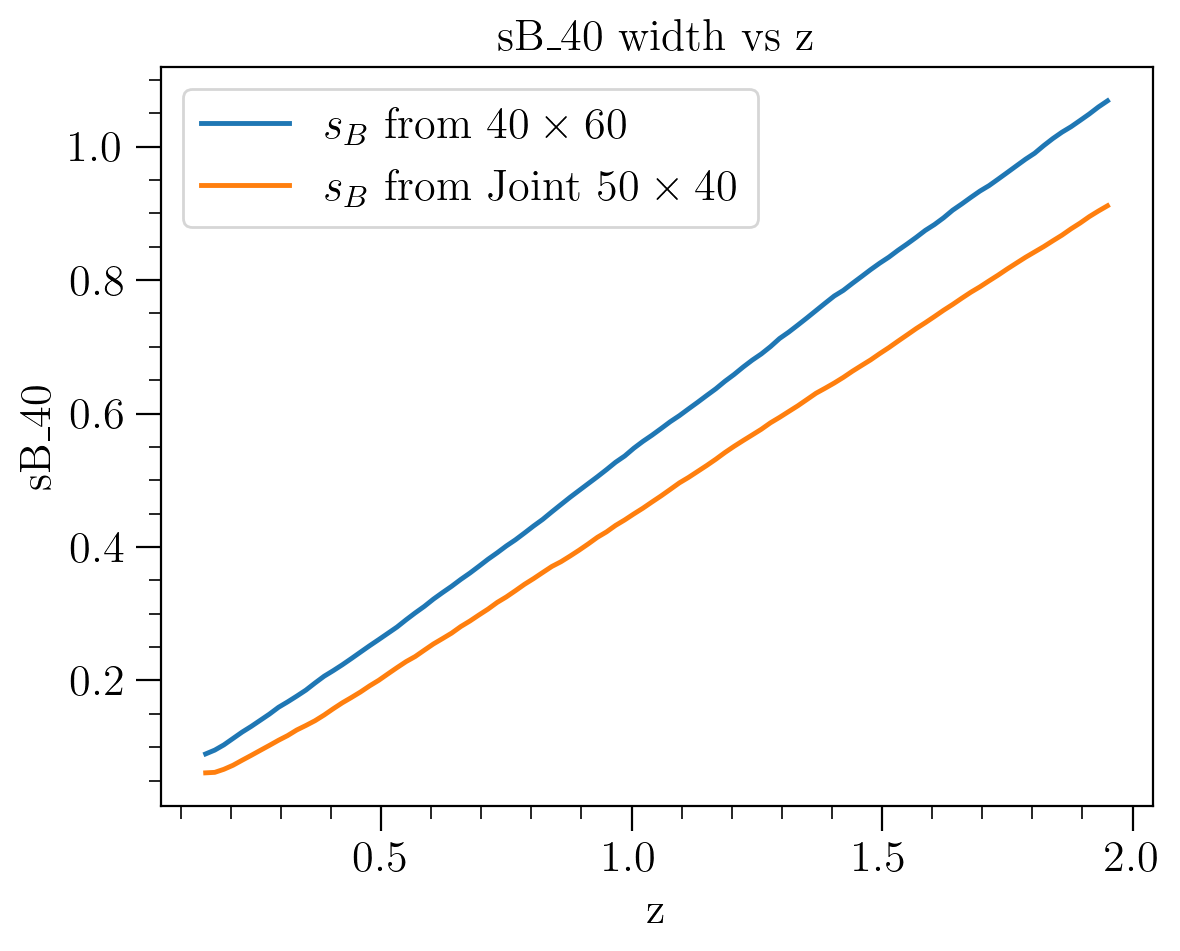

In [9]:
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sB_40'], label='$s_B$ from $40 \\times 60$')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sB_Joint_40'], label='$s_B$ from Joint $50 \\times 40$')

plt.xlabel('z')
plt.ylabel('sB_40')
plt.legend()
plt.title('sB_40 width vs z')
#plt.yscale('log')
plt.show()

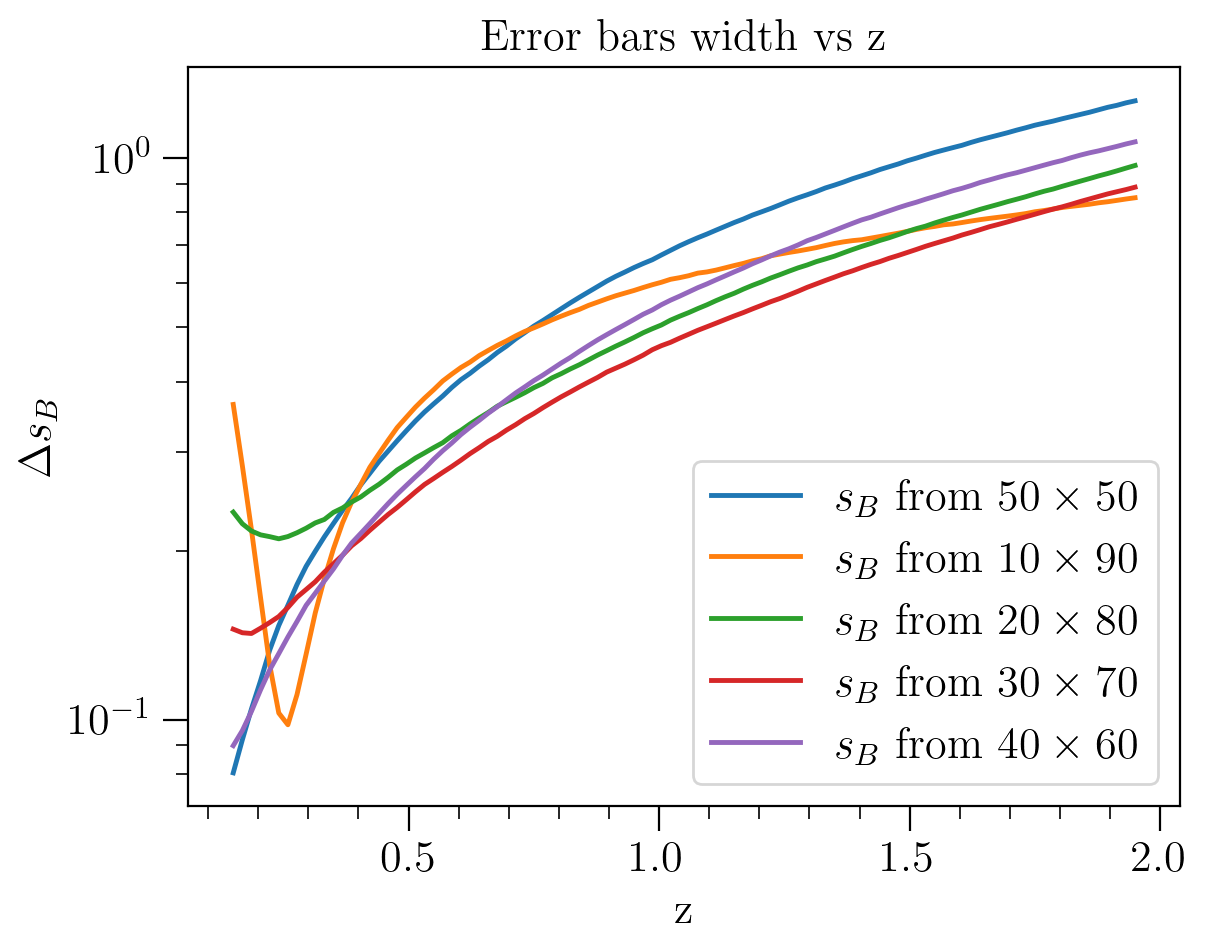

In [10]:
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_50'], label='$s_B$ from $50 \\times 50$')
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_10'], label='$s_B$ from $10 \\times 90$')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sB_20'], label='$s_B$ from $20 \\times 80$')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sB_30'], label='$s_B$ from $30 \\times 70$')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sB_40'], label='$s_B$ from $40 \\times 60$')


plt.xlabel('z')
plt.ylabel('$\Delta s_B$')
plt.legend()
plt.title('Error bars width vs z')
plt.yscale('log')
plt.show()

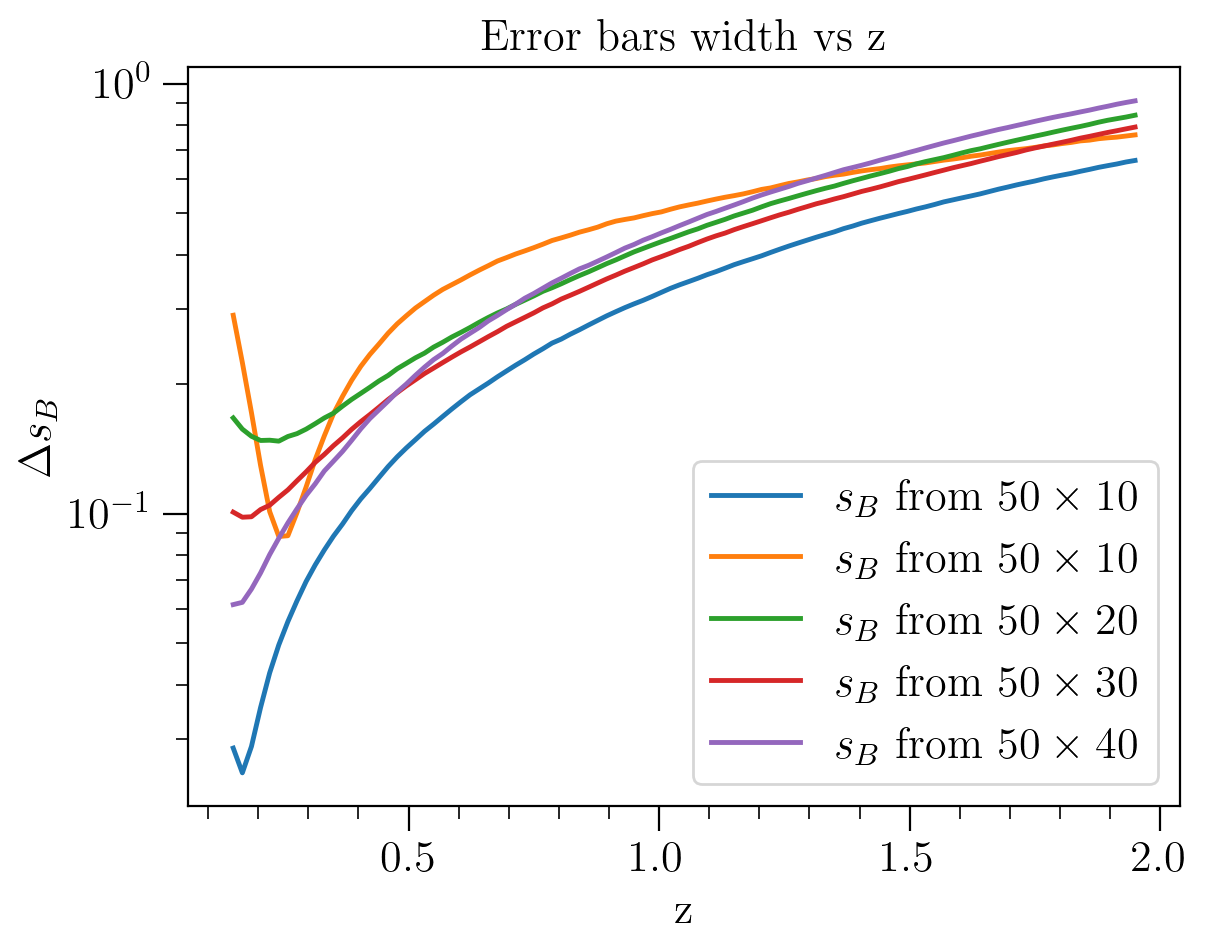

In [11]:
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_Joint_50'], label='$s_B$ from $50 \\times 10$')
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_Joint_10'], label='$s_B$ from $50 \\times 10$')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sB_Joint_20'], label='$s_B$ from $50 \\times 20$')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sB_Joint_30'], label='$s_B$ from $50 \\times 30$')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sB_Joint_40'], label='$s_B$ from $50 \\times 40$')

plt.xlabel('z')
plt.ylabel('$\Delta s_B$')
plt.legend()
plt.title('Error bars width vs z')
plt.yscale('log')
plt.show()

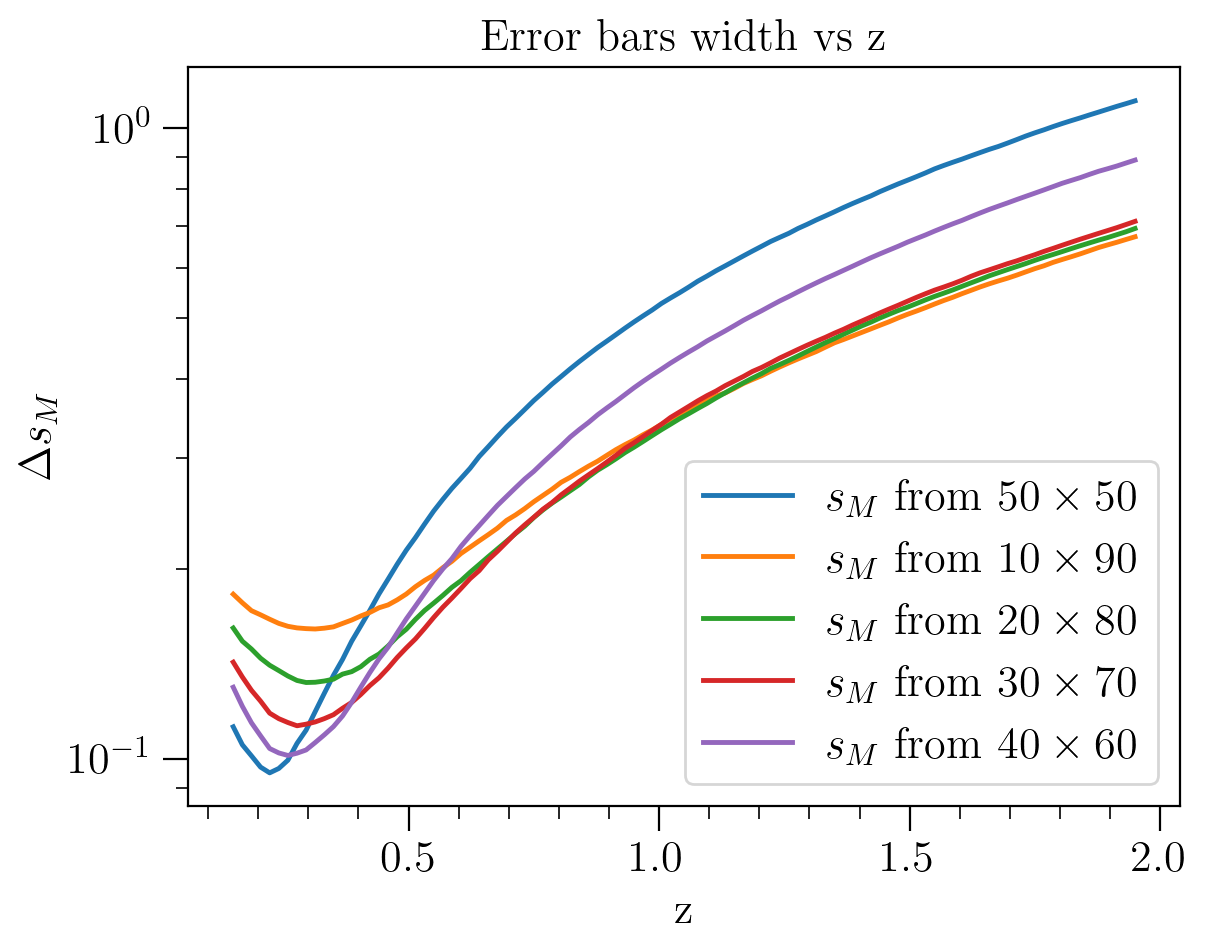

In [12]:
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sM_50'], label='$s_M$ from $50 \\times 50$')
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sM_10'], label='$s_M$ from $10 \\times 90$')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sM_20'], label='$s_M$ from $20 \\times 80$')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sM_30'], label='$s_M$ from $30 \\times 70$')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sM_40'], label='$s_M$ from $40 \\times 60$')

plt.xlabel('z')
plt.ylabel('$\Delta s_M$')
plt.legend()
plt.title('Error bars width vs z')
plt.yscale('log')
plt.show()

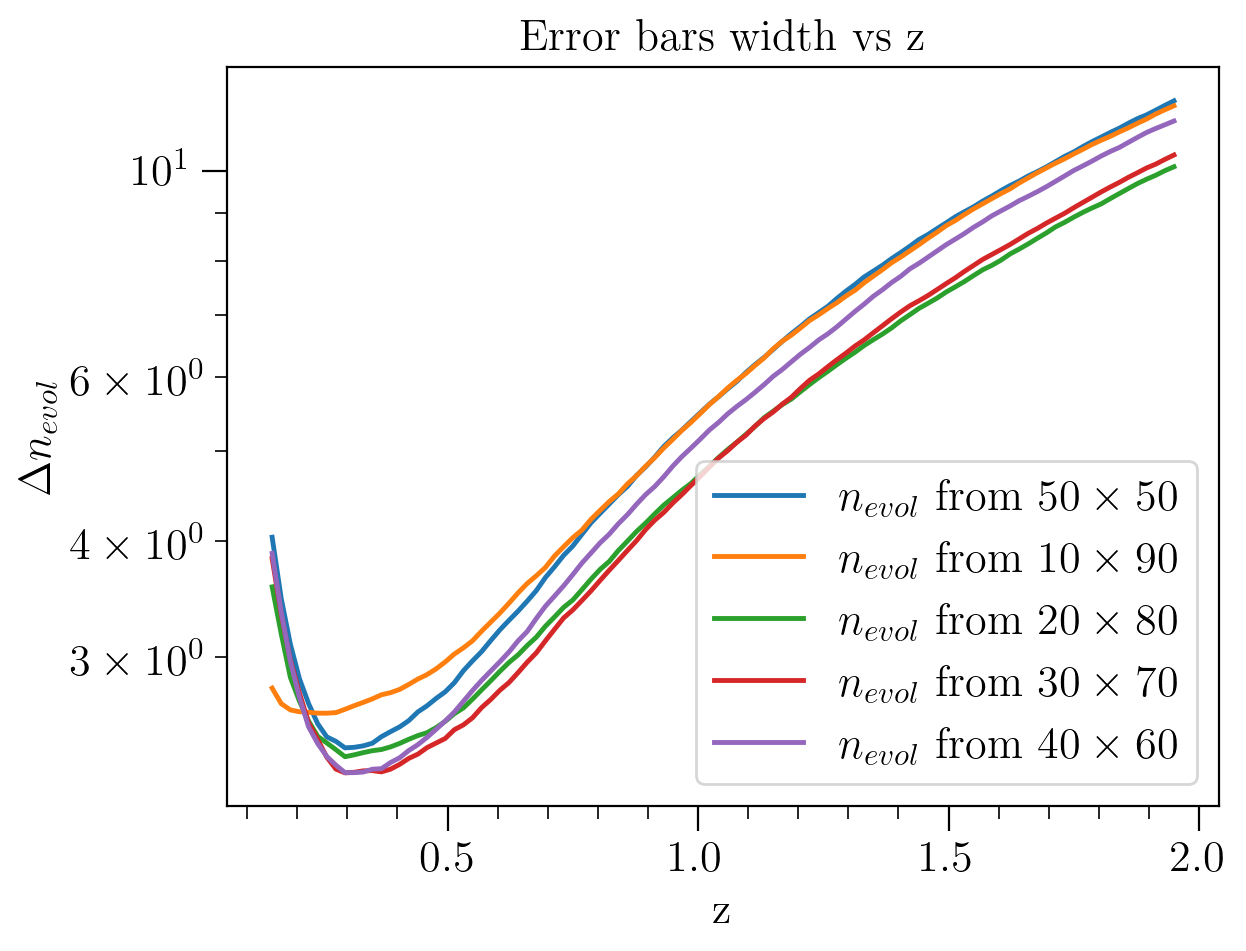

In [13]:
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_50'], label='$n_{evol}$ from $50 \\times 50$')
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_10'], label='$n_{evol}$ from $10 \\times 90$')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['nevol_20'], label='$n_{evol}$ from $20 \\times 80$')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['nevol_30'], label='$n_{evol}$ from $30 \\times 70$')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['nevol_40'], label='$n_{evol}$ from $40 \\times 60$')

plt.xlabel('z')
plt.ylabel('$\Delta n_{evol}$')
plt.legend()
plt.title('Error bars width vs z')
plt.yscale('log')
plt.show()

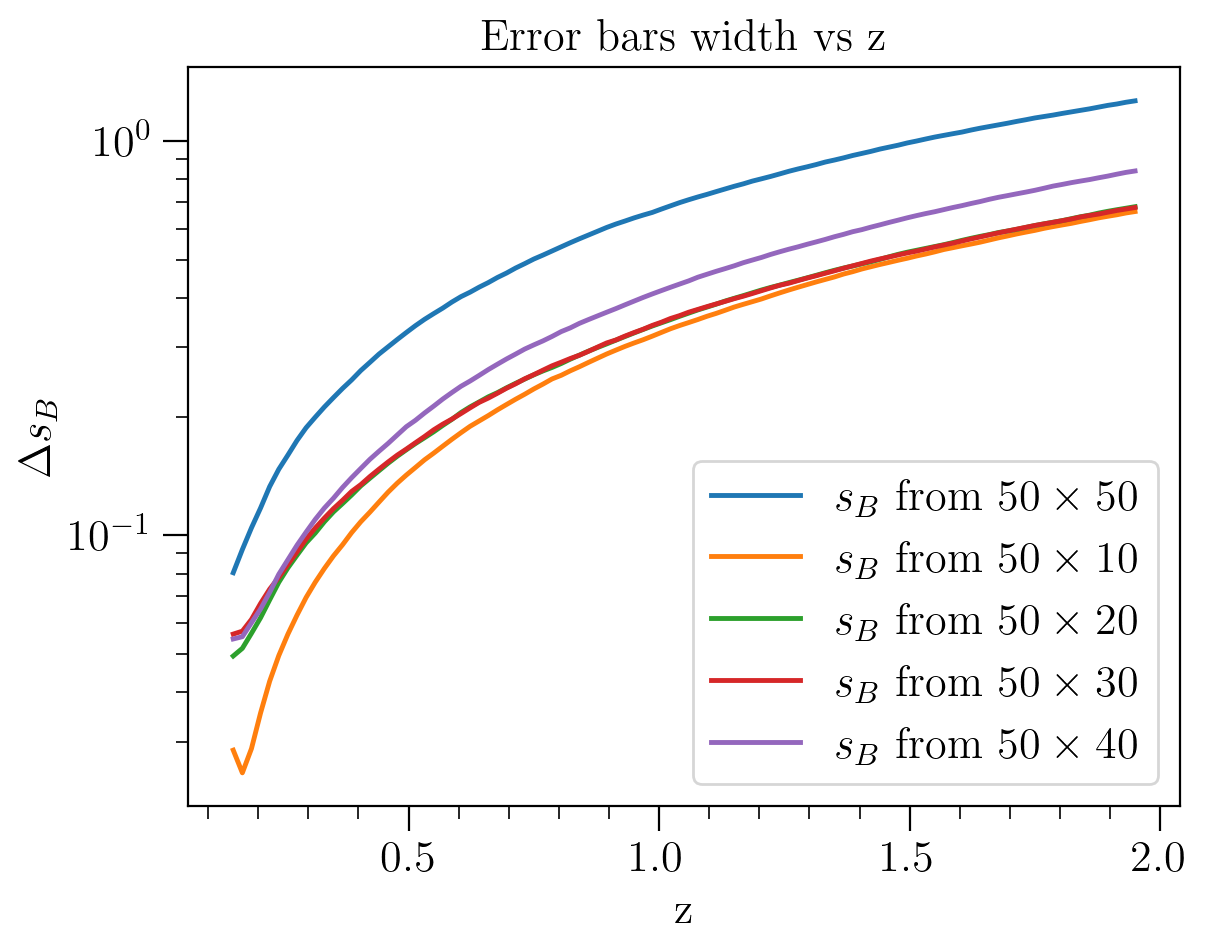

In [14]:
# Compare all the values with respect to the 50x50 case 

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_50'], label='$s_B$ from $50 \\times 50$')

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_Joint_50'], label='$s_B$ from $50 \\times 10$')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sB_Joint_50'], label='$s_B$ from $50 \\times 20$')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sB_Joint_50'], label='$s_B$ from $50 \\times 30$')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sB_Joint_50'], label='$s_B$ from $50 \\times 40$')

plt.xlabel('z')
plt.ylabel('$\Delta s_B$')
plt.legend()
plt.title('Error bars width vs z')
plt.yscale('log')
plt.show()

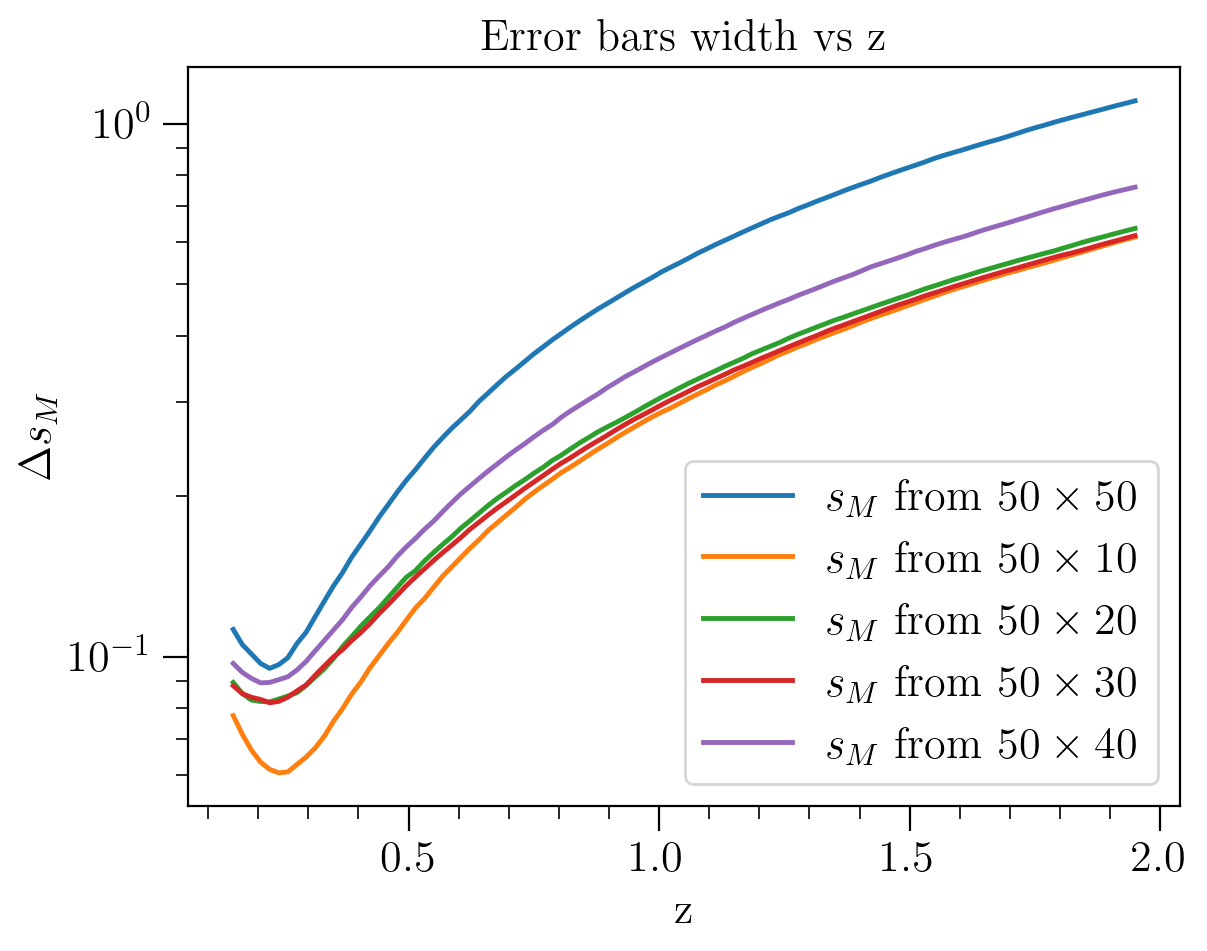

In [15]:
# Compare all the values with respect to the 50x50 case 

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sM_50'], label='$s_M$ from $50 \\times 50$')

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sM_Joint'], label='$s_M$ from $50 \\times 10$')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sM_Joint'], label='$s_M$ from $50 \\times 20$')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sM_Joint'], label='$s_M$ from $50 \\times 30$')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sM_Joint'], label='$s_M$ from $50 \\times 40$')

plt.xlabel('z')
plt.ylabel('$\Delta s_M$')
plt.legend()
plt.title('Error bars width vs z')
plt.yscale('log')
plt.show()

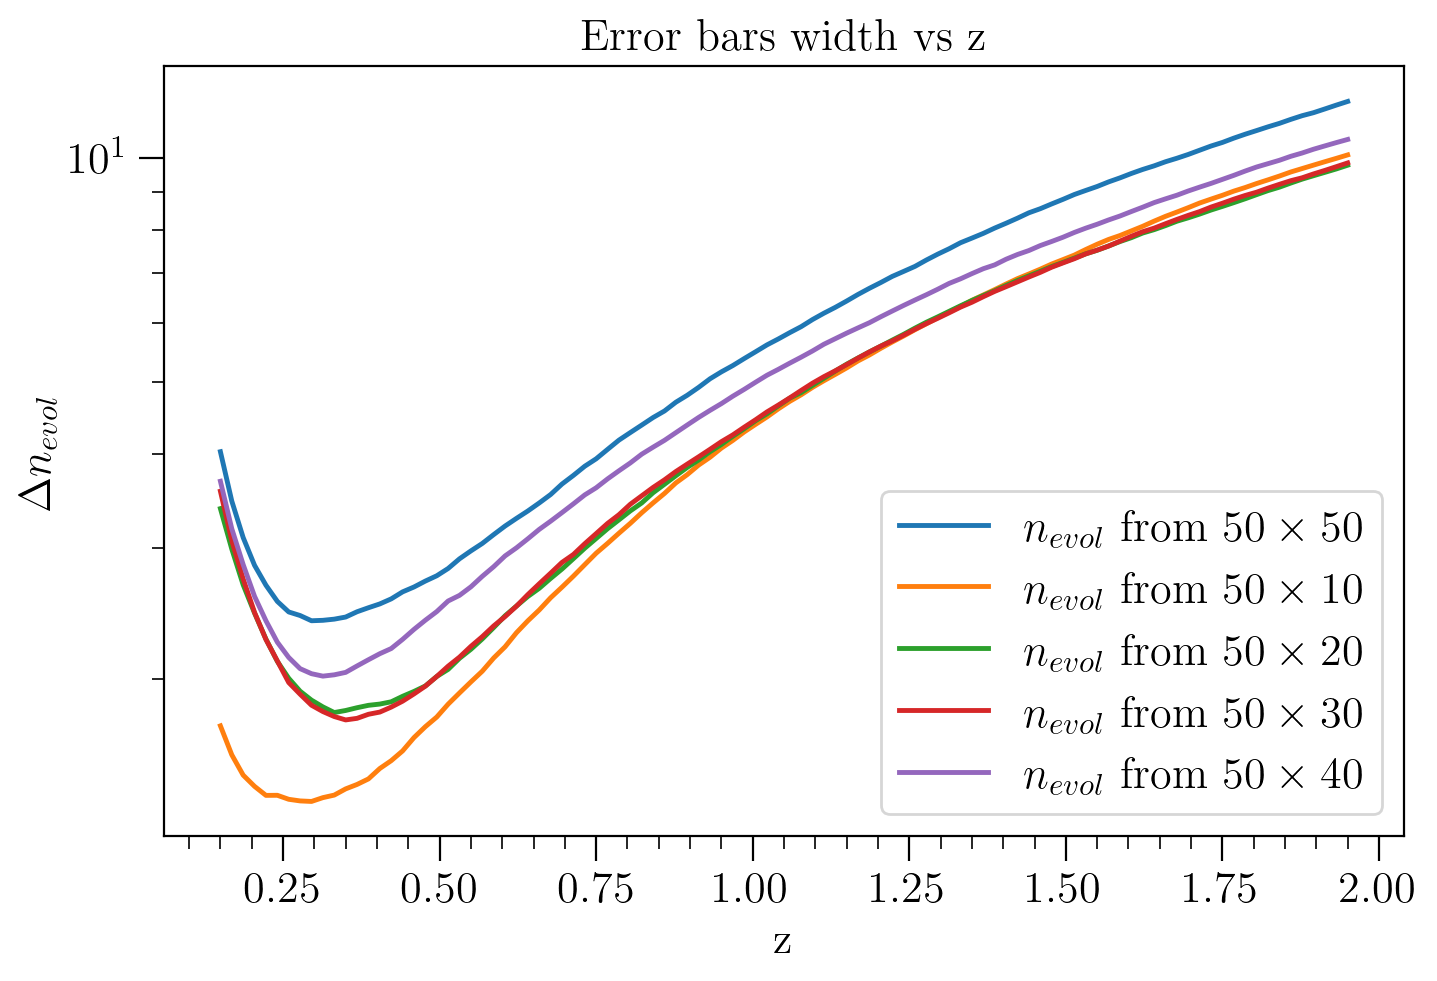

In [16]:
# Compare all the values with respect to the 50x50 case 

plt.figure(figsize=(8, 5))

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_50'], label='$n_{evol}$ from $50 \\times 50$')

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_Joint'], label='$n_{evol}$ from $50 \\times 10$')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['nevol_Joint'], label='$n_{evol}$ from $50 \\times 20$')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['nevol_Joint'], label='$n_{evol}$ from $50 \\times 30$')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['nevol_Joint'], label='$n_{evol}$ from $50 \\times 40$')

plt.xlabel('z')
plt.ylabel('$\Delta n_{evol}$')
plt.legend()
plt.title('Error bars width vs z')
plt.yscale('log')
plt.show()

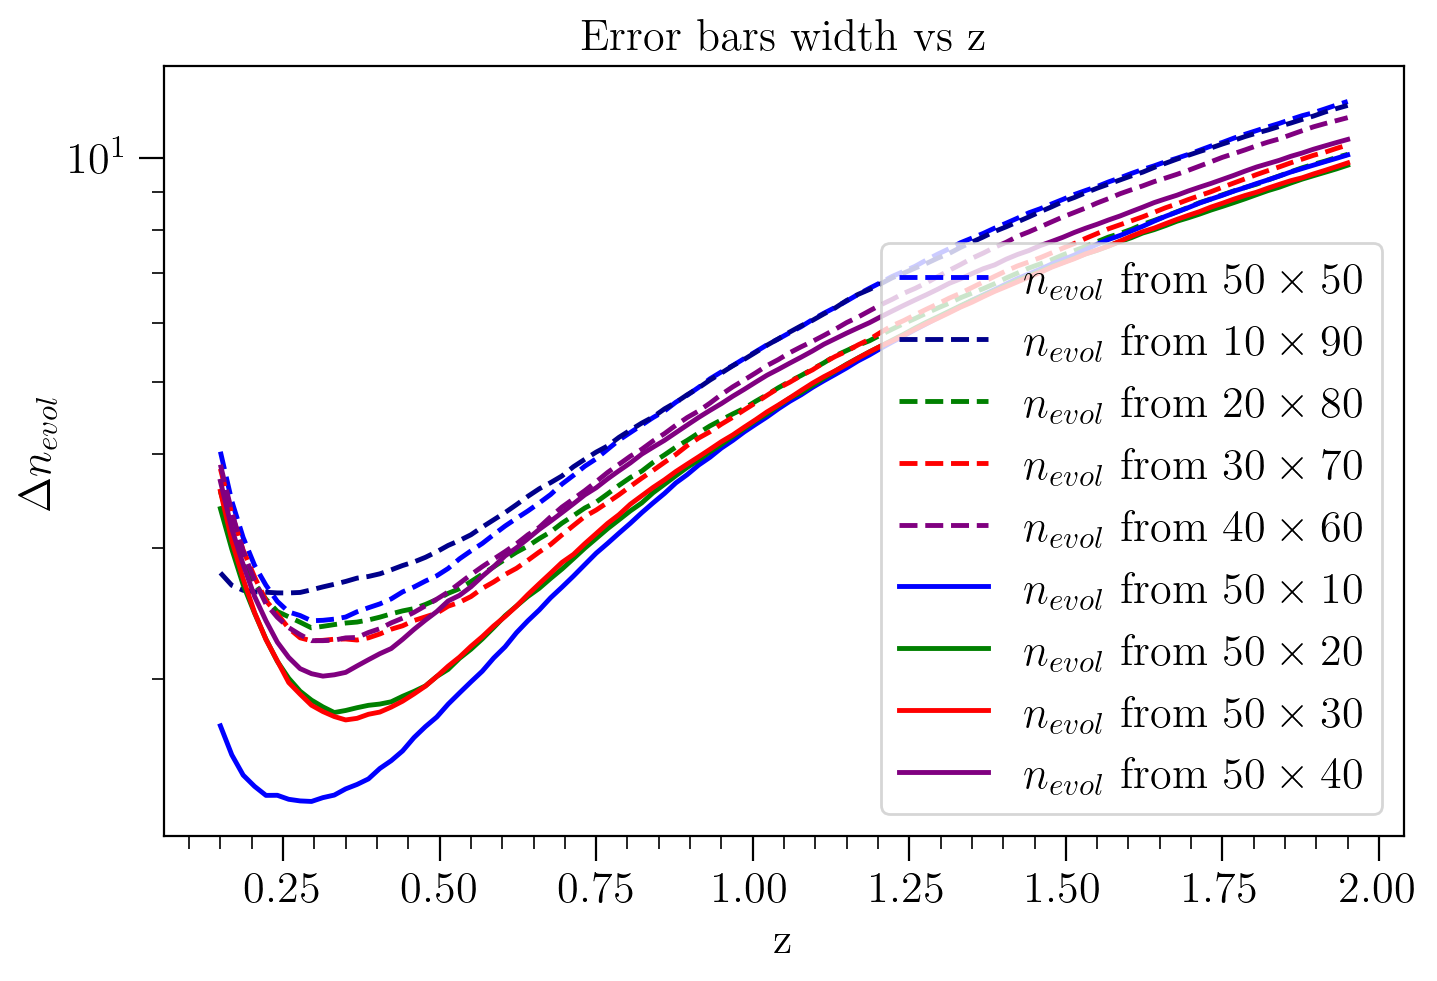

In [17]:
# Compare all the values with respect to the 50x50 case 

plt.figure(figsize=(8, 5))

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_50'], '--', label='$n_{evol}$ from $50 \\times 50$', color='blue')
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_10'], '--', label='$n_{evol}$ from $10 \\times 90$', color='darkblue')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['nevol_20'], '--', label='$n_{evol}$ from $20 \\times 80$', color='green')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['nevol_30'], '--', label='$n_{evol}$ from $30 \\times 70$', color='red')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['nevol_40'], '--', label='$n_{evol}$ from $40 \\times 60$', color='purple')


plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_Joint'], label='$n_{evol}$ from $50 \\times 10$', color='blue')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['nevol_Joint'], label='$n_{evol}$ from $50 \\times 20$', color='green')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['nevol_Joint'], label='$n_{evol}$ from $50 \\times 30$', color='red')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['nevol_Joint'], label='$n_{evol}$ from $50 \\times 40$', color='purple')

plt.xlabel('z')
plt.ylabel('$\Delta n_{evol}$')
plt.legend()
plt.title('Error bars width vs z')
plt.yscale('log')
plt.show()

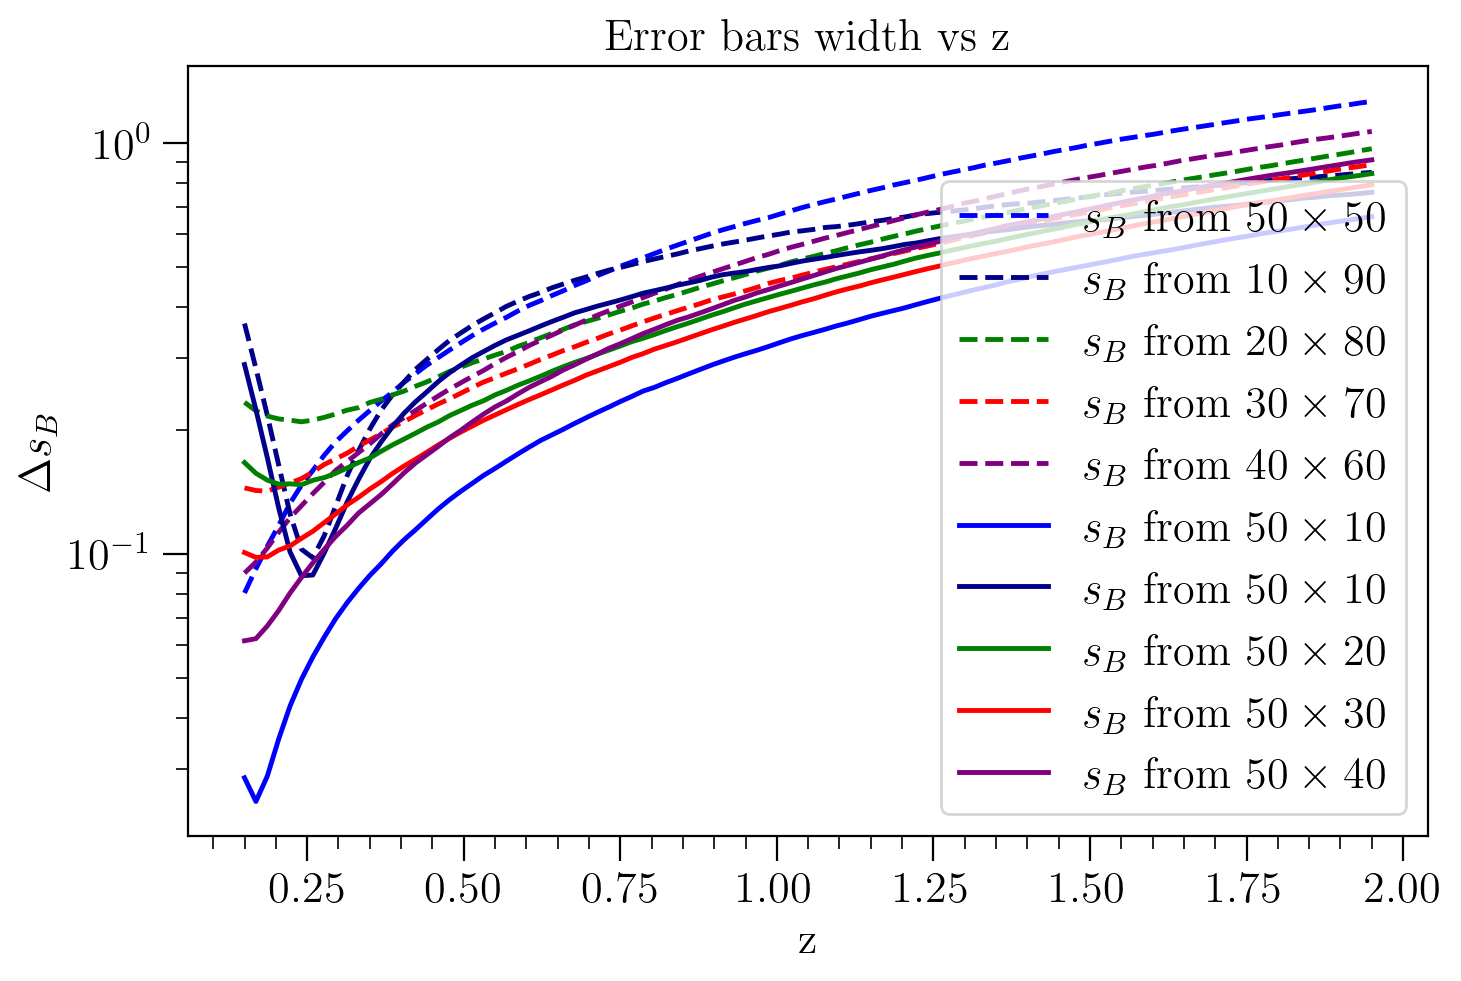

In [18]:
# Compare all 

plt.figure(figsize=(8, 5))

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_50'], '--', label='$s_B$ from $50 \\times 50$', color='blue')
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_10'], '--', label='$s_B$ from $10 \\times 90$', color='darkblue')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sB_20'], '--', label='$s_B$ from $20 \\times 80$', color='green')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sB_30'], '--', label='$s_B$ from $30 \\times 70$', color='red')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sB_40'], '--', label='$s_B$ from $40 \\times 60$', color='purple')


plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_Joint_50'], label='$s_B$ from $50 \\times 10$', color='blue')
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_Joint_10'], label='$s_B$ from $50 \\times 10$', color='darkblue')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sB_Joint_20'], label='$s_B$ from $50 \\times 20$', color='green')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sB_Joint_30'], label='$s_B$ from $50 \\times 30$', color='red')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sB_Joint_40'], label='$s_B$ from $50 \\times 40$', color='purple')

plt.xlabel('z')
plt.ylabel('$\Delta s_B$')
plt.legend()
plt.title('Error bars width vs z')
plt.yscale('log')
plt.show()

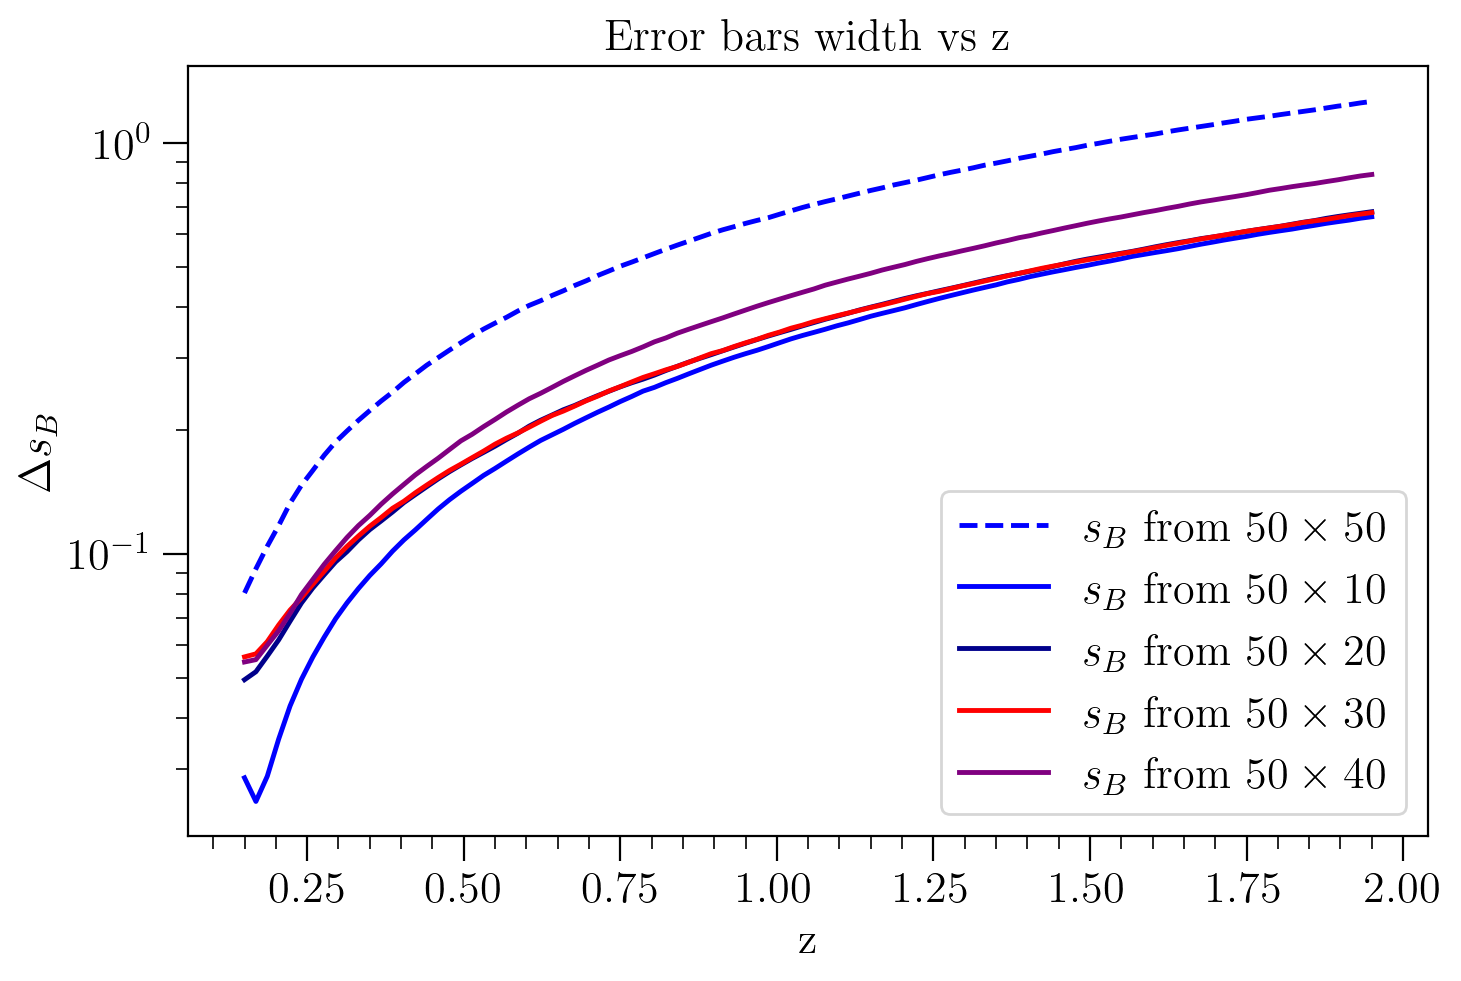

In [19]:
# Compare all 

plt.figure(figsize=(8, 5))

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_50'], '--', label='$s_B$ from $50 \\times 50$', color='blue')

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_Joint_50'], label='$s_B$ from $50 \\times 10$', color='blue')
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sB_Joint_50'], label='$s_B$ from $50 \\times 20$', color='darkblue')
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sB_Joint_50'], label='$s_B$ from $50 \\times 30$', color='red')
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sB_Joint_50'], label='$s_B$ from $50 \\times 40$', color='purple')


plt.xlabel('z')
plt.ylabel('$\Delta s_B$')
plt.legend()
plt.title('Error bars width vs z')
plt.yscale('log')
plt.show()

# Chosen plots

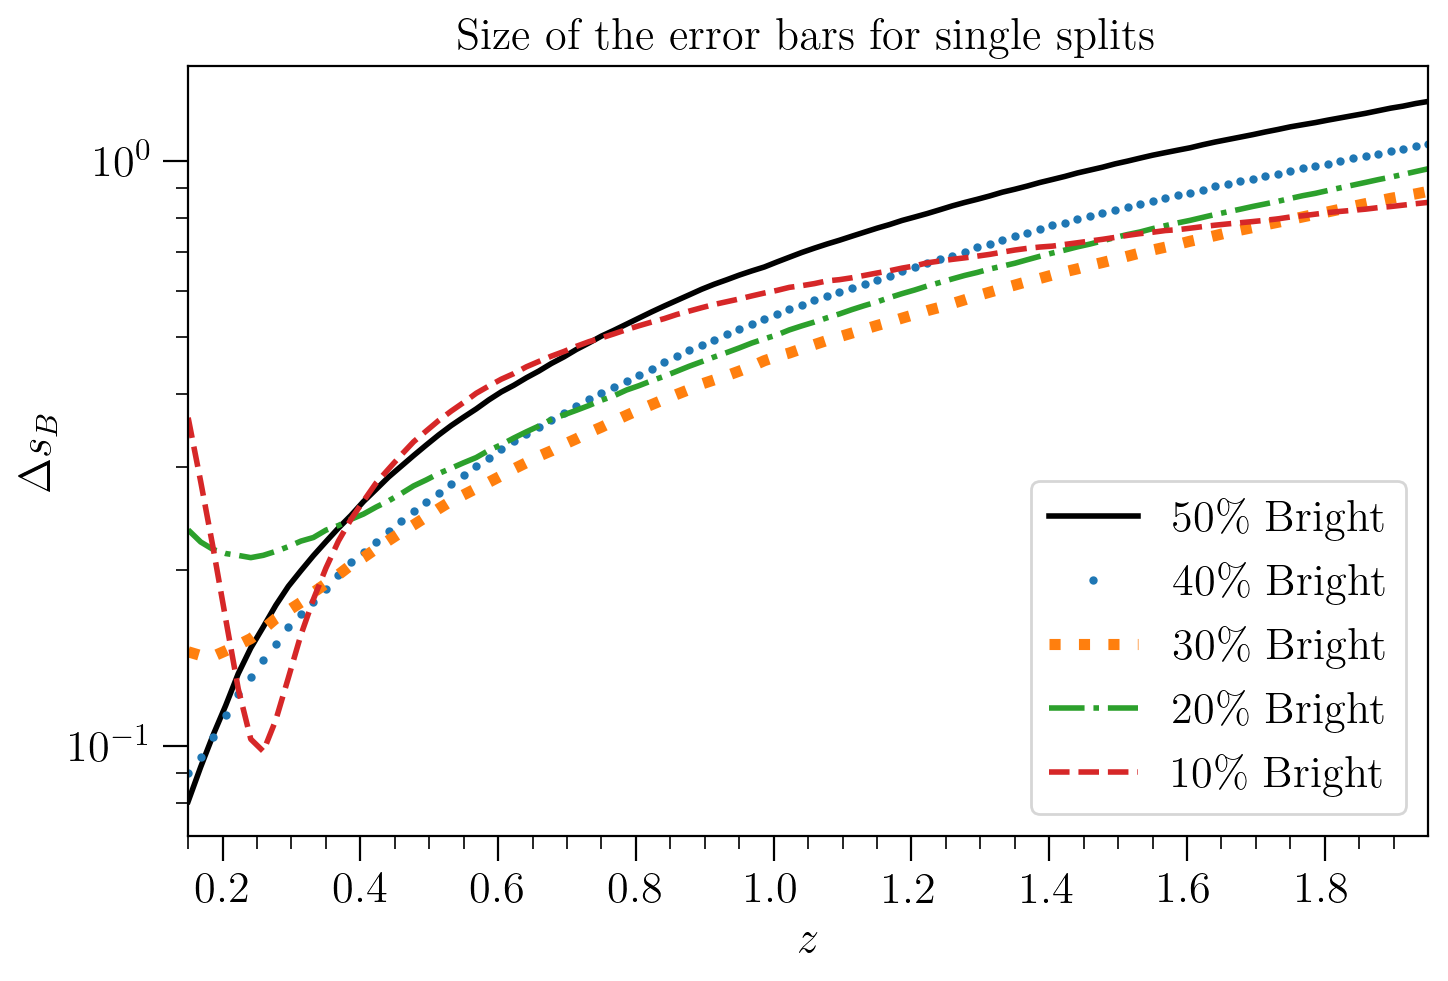

In [20]:
# Compare error bars for single splits

plt.figure(figsize=(8, 5))

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_50'], label='$50\%$ Bright', color='black', linewidth=2.0)
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sB_40'], '.',label='$40\%$ Bright', markersize=4.0)
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sB_30'], ':', label='$30\%$ Bright', linewidth=4.0)
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sB_20'], '-.', label='$20\%$ Bright', linewidth=2.0)
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_10'], '--', label='$10\%$ Bright', linewidth=2.0)
plt.xlim(0.15, 1.95)

plt.xlabel('$z$')
plt.ylabel('$\Delta s_B$')
plt.legend()
plt.title('Size of the error bars for single splits')
plt.yscale('log')
plt.show()

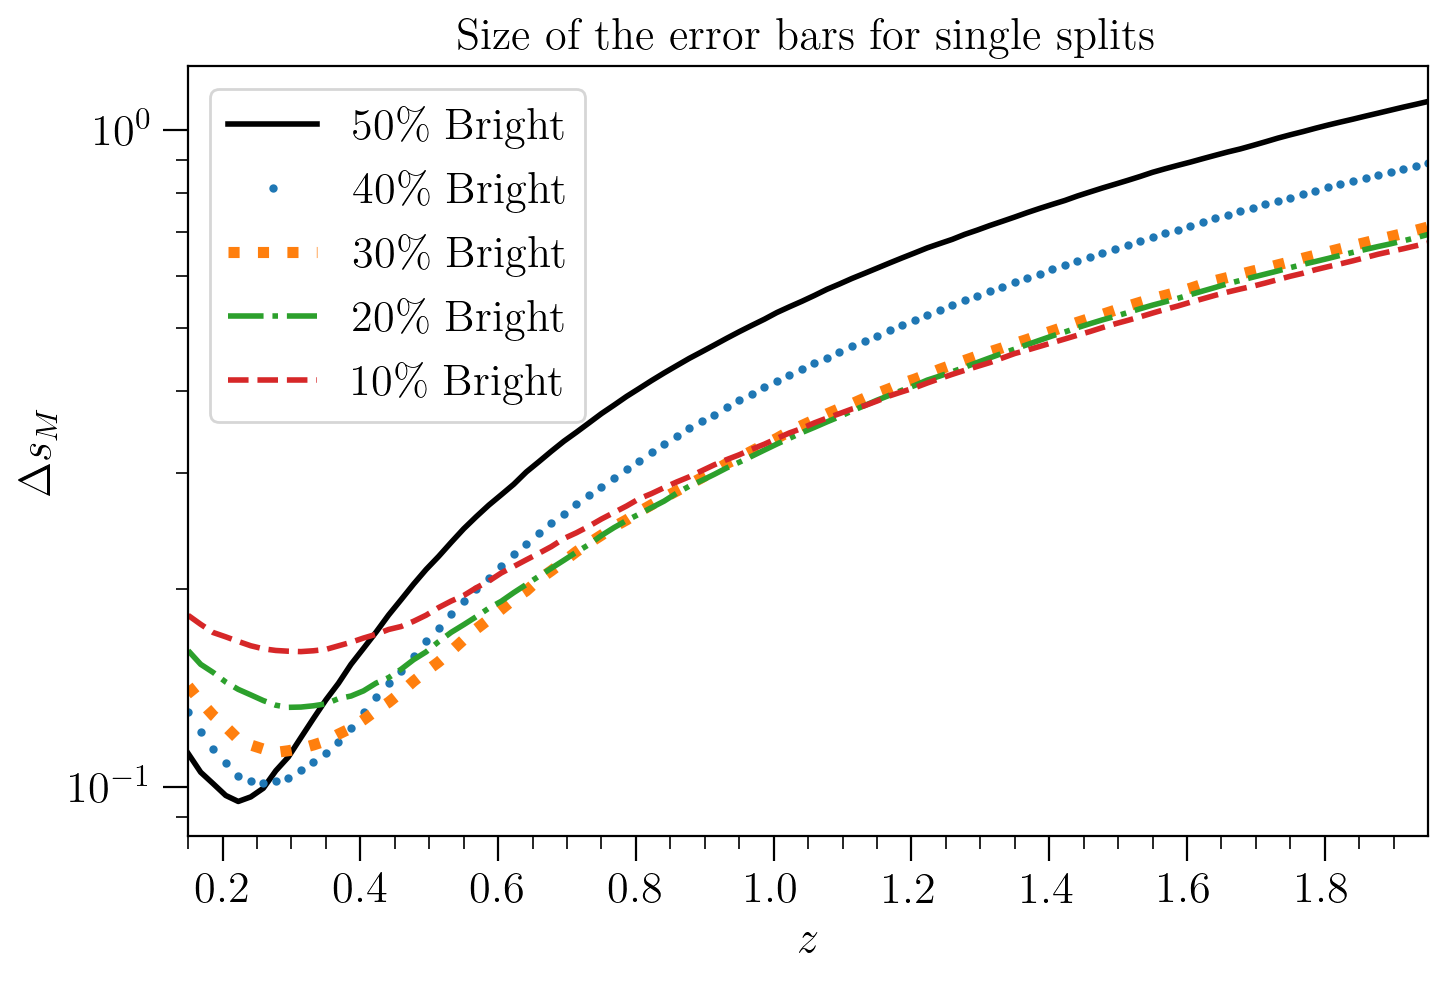

In [21]:
# Compare error bars for single splits

plt.figure(figsize=(8, 5))

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sM_50'], label='$50\%$ Bright', color='black', linewidth=2.0)
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sM_40'], '.',label='$40\%$ Bright', markersize=4.0)
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sM_30'], ':', label='$30\%$ Bright', linewidth=4.0)
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sM_20'], '-.', label='$20\%$ Bright', linewidth=2.0)
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sM_10'], '--', label='$10\%$ Bright', linewidth=2.0)

plt.xlim(0.15, 1.95)

plt.xlabel('$z$')
plt.ylabel('$\Delta s_M$')
plt.legend()
plt.title('Size of the error bars for single splits')
plt.yscale('log')
plt.show()

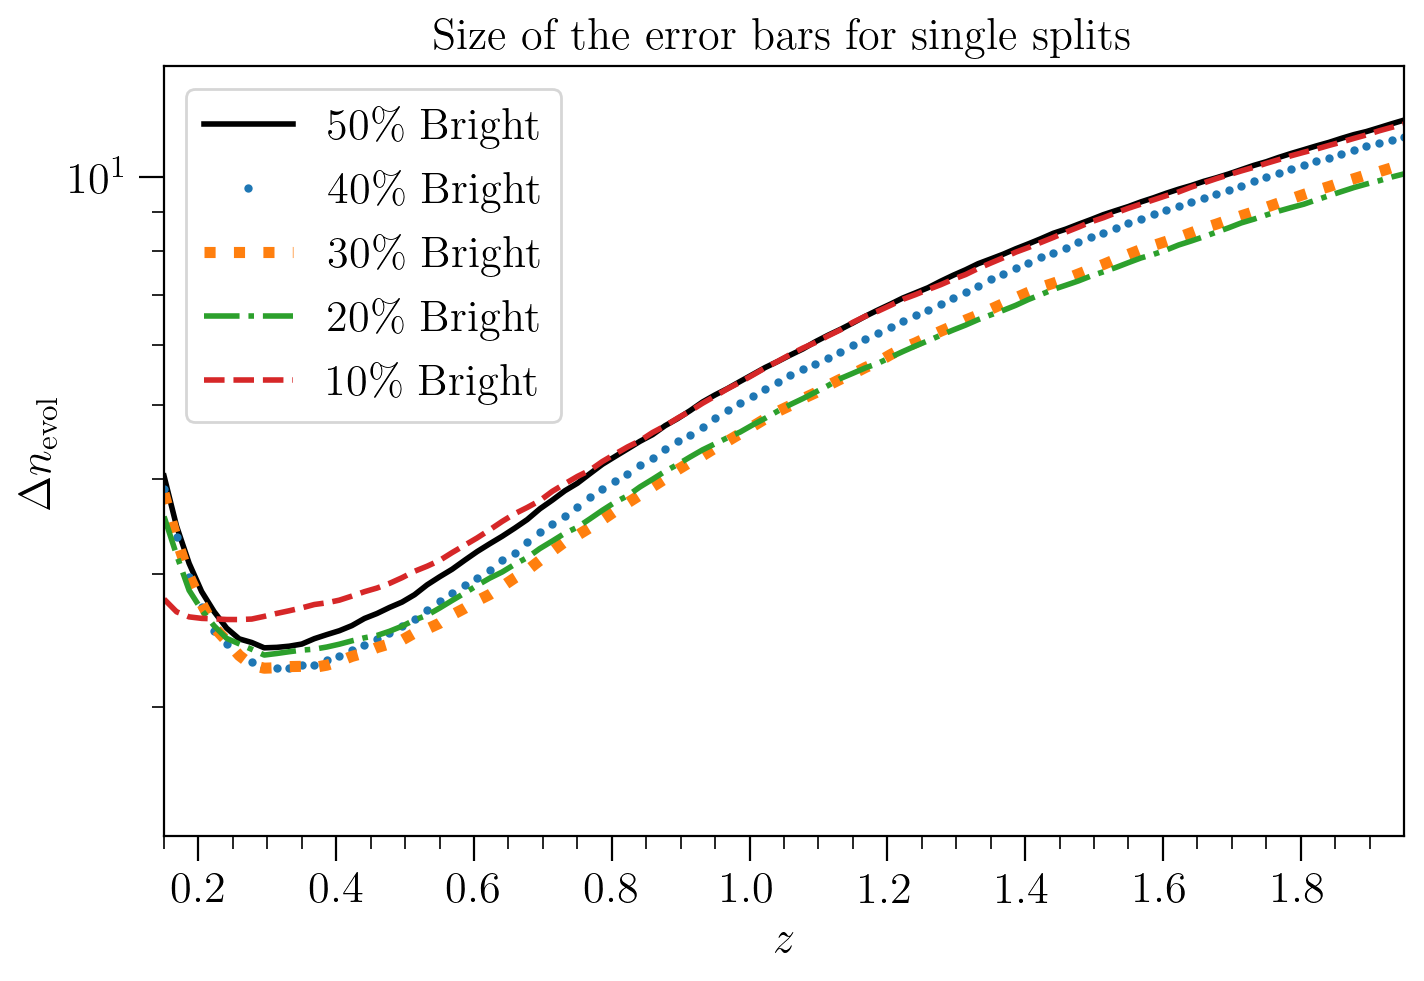

In [22]:
# Compare error bars for single splits

plt.figure(figsize=(8, 5))

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_50'], 
        label='$50\%$ Bright', color='black', linewidth=2.0)
plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['nevol_40'],
         '.',label='$40\%$ Bright', markersize=4.0)
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['nevol_30'], 
         ':', label='$30\%$ Bright', linewidth=4.0)
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['nevol_20'],
         '-.', label='$20\%$ Bright', linewidth=2.0)
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_10'],
         '--', label='$10\%$ Bright', linewidth=2.0)

plt.xlim(0.15, 1.95)
plt.ylim(1.35, 14.0)


plt.xlabel('$z$')
plt.ylabel('$\Delta n_{\mathrm{evol}}$')
plt.legend()
plt.title('Size of the error bars for single splits')
plt.yscale('log')
plt.show()

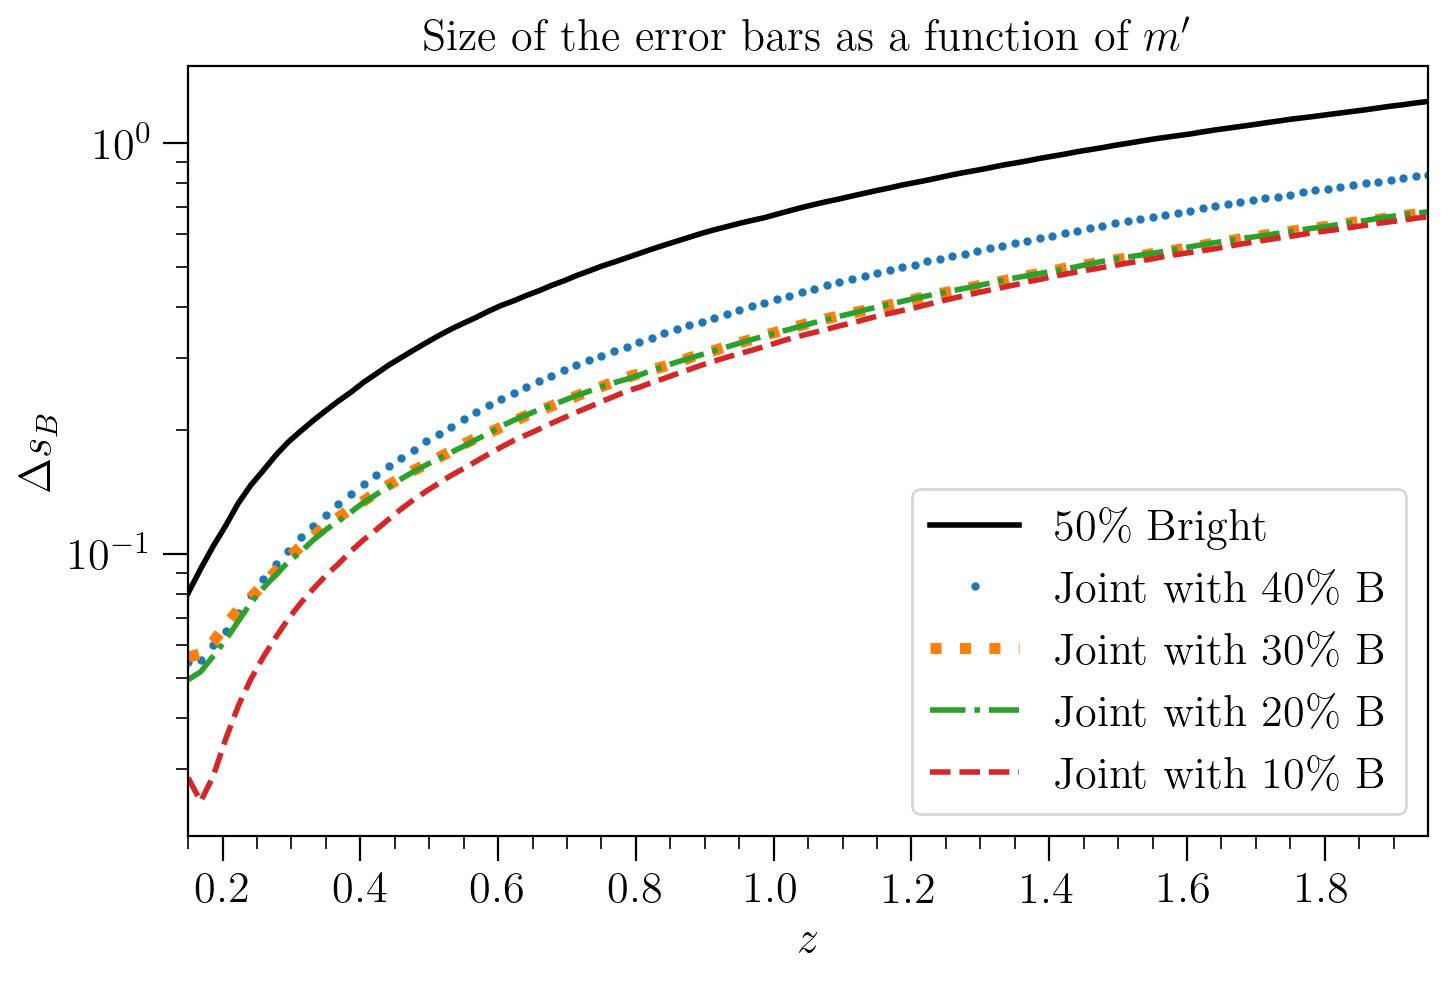

In [23]:
# Compare all 

plt.figure(figsize=(8, 5))

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_50'], label='$50\%$ Bright', color='black', linewidth=2.0)

plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sB_Joint_50'], '.', label='Joint with $40\%$ B', markersize=4.0)
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sB_Joint_50'], ':', label='Joint with $30\%$ B', linewidth=4.0)
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sB_Joint_50'], '-.',label='Joint with $20\%$ B', linewidth=2.0)
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_Joint_50'], '--',label='Joint with $10\%$ B', linewidth=2.0)

plt.xlim(0.15, 1.95)

plt.xlabel('$z$')
plt.ylabel('$\Delta s_B$')
plt.legend()
plt.title('Size of the error bars as a function of $m\'$')
plt.yscale('log')
plt.show()

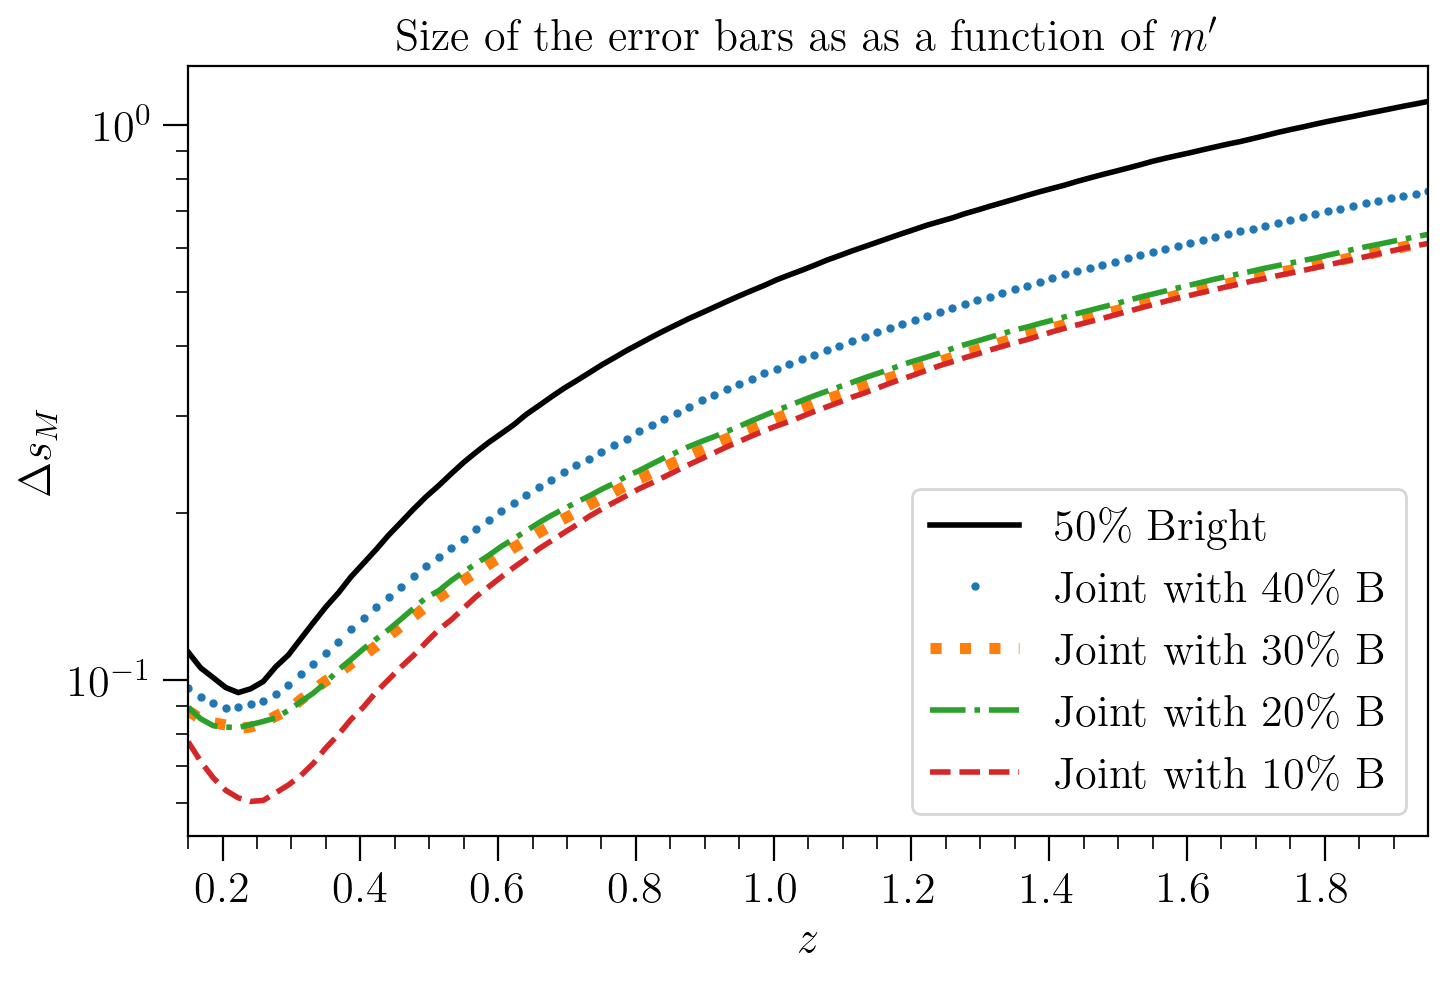

In [24]:
# Compare all 

plt.figure(figsize=(8, 5))

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sM_50'], label='$50\%$ Bright', color='black', linewidth=2.0)

plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sM_Joint'], '.', label='Joint with $40\%$ B', markersize=4.0)
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sM_Joint'], ':', label='Joint with $30\%$ B', linewidth=4.0)
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sM_Joint'], '-.',label='Joint with $20\%$ B', linewidth=2.0)
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sM_Joint'], '--',label='Joint with $10\%$ B', linewidth=2.0)

plt.xlim(0.15, 1.95)

plt.xlabel('$z$')
plt.ylabel('$\Delta s_M$')
plt.legend()
plt.title('Size of the error bars as as a function of $m\'$')
plt.yscale('log')
plt.show()

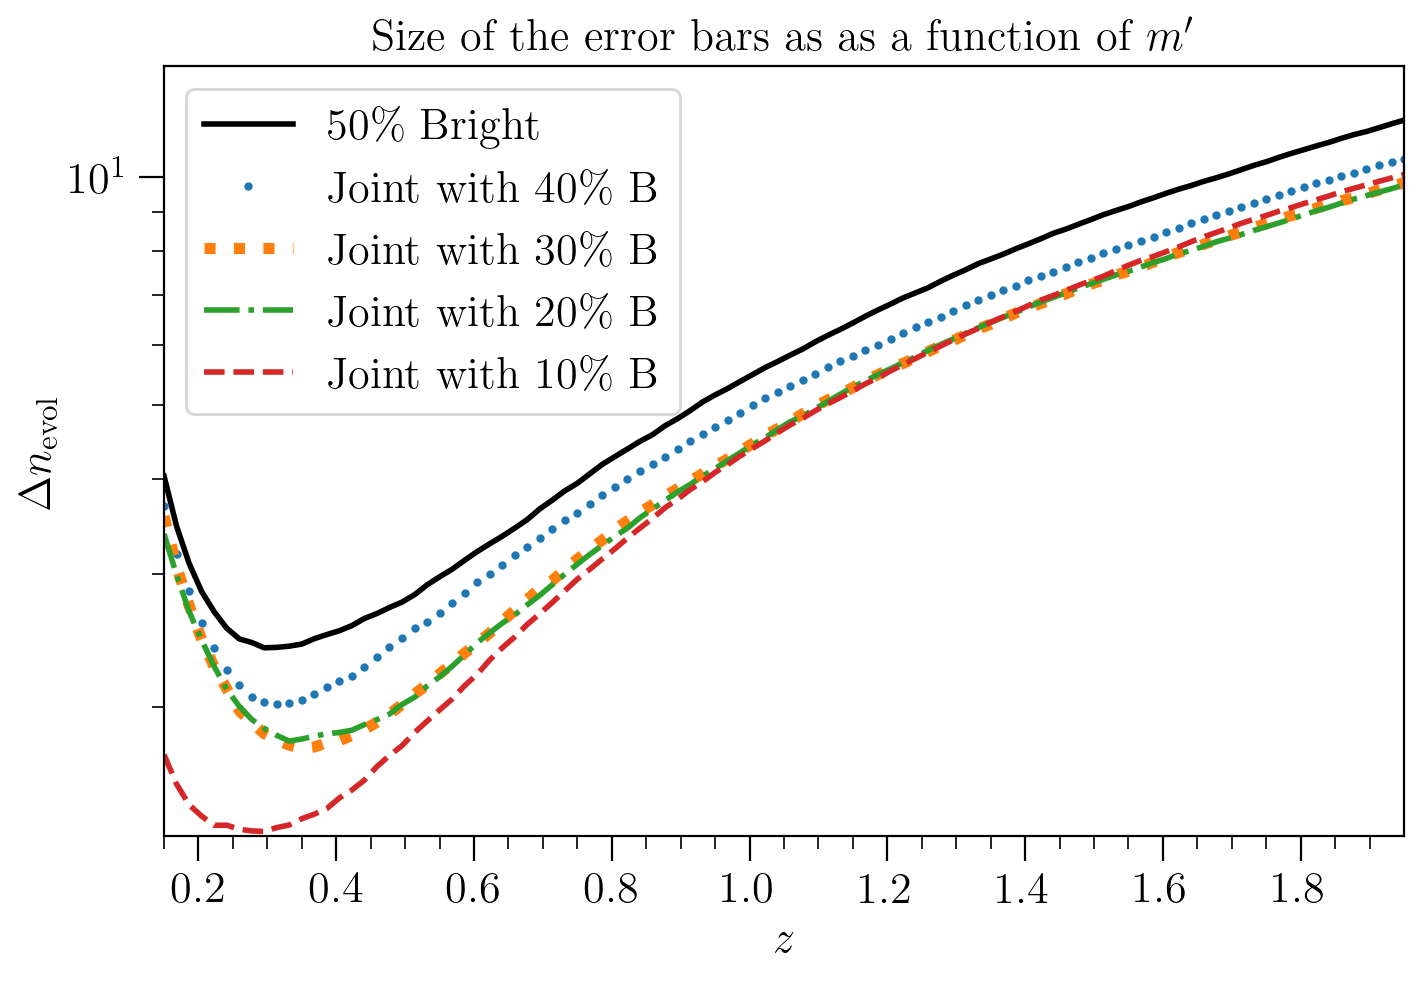

In [25]:
# Compare all 

plt.figure(figsize=(8, 5))

plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_50'], label='$50\%$ Bright', color='black', linewidth=2.0)

plt.plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['nevol_Joint'], '.', label='Joint with $40\%$ B', markersize=4.0)
plt.plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['nevol_Joint'], ':', label='Joint with $30\%$ B', linewidth=4.0)
plt.plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['nevol_Joint'], '-.',label='Joint with $20\%$ B', linewidth=2.0)
plt.plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_Joint'], '--',label='Joint with $10\%$ B', linewidth=2.0)

plt.xlim(0.15, 1.95)
plt.ylim(1.35, 14.0)

plt.xlabel('$z$')
plt.ylabel('$\Delta n_{\mathrm{evol}}$')
plt.legend()
plt.title('Size of the error bars as as a function of $m\'$')
plt.yscale('log')
plt.show()

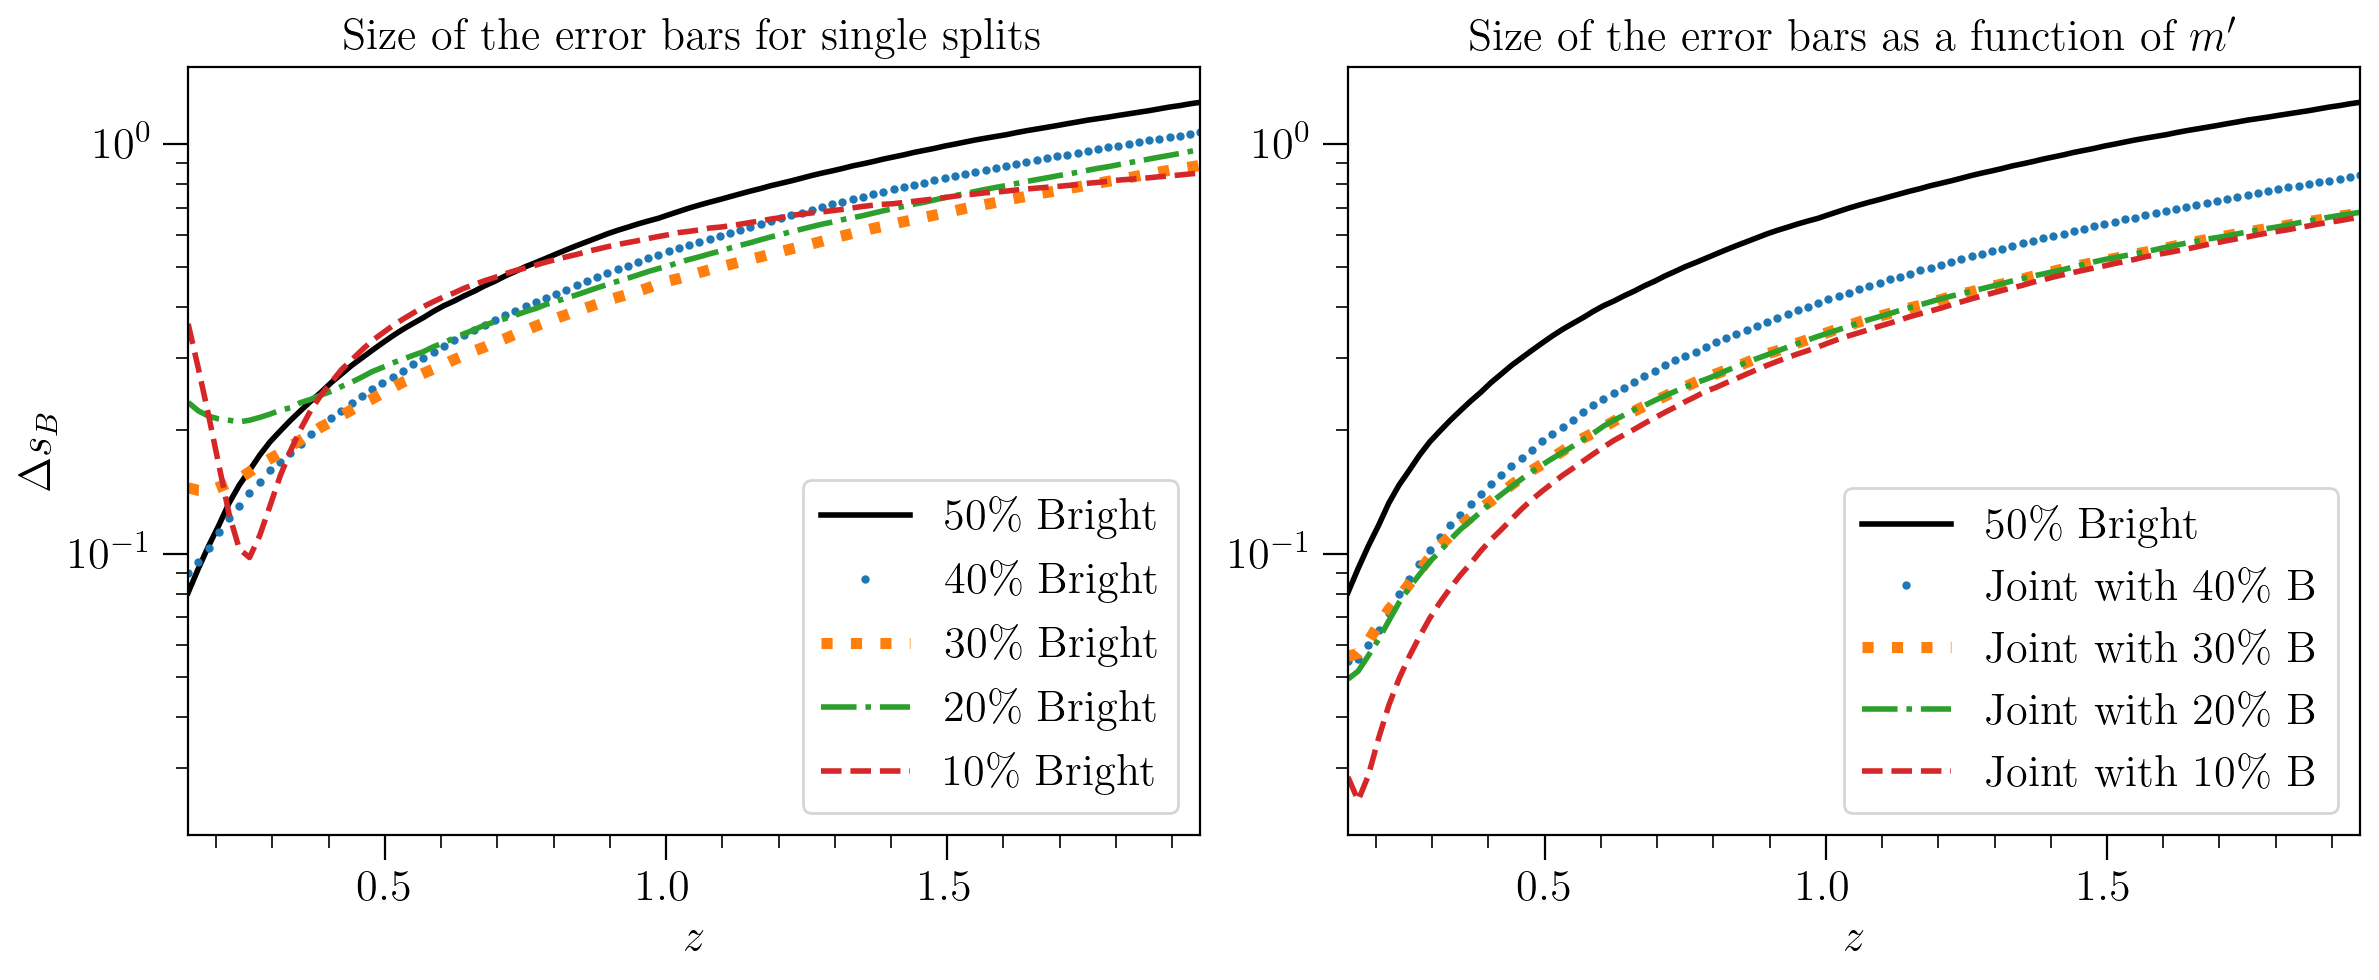

In [40]:
import matplotlib.pyplot as plt

# Set the global parameters for the plots
plt.rcParams.update(params)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1
axs[0].plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_50'], label='$50\%$ Bright', color='black', linewidth=2.0)
axs[0].plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sB_40'], '.',label='$40\%$ Bright', markersize=4.0)
axs[0].plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sB_30'], ':', label='$30\%$ Bright', linewidth=4.0)
axs[0].plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sB_20'], '-.', label='$20\%$ Bright', linewidth=2.0)
axs[0].plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_10'], '--', label='$10\%$ Bright', linewidth=2.0)

axs[0].set_xlim(0.15, 1.95)

axs[0].set_xlabel('$z$')
axs[0].set_ylabel('$\Delta s_B$')
axs[0].legend()
axs[0].set_title('Size of the error bars for single splits')
axs[0].set_yscale('log')
#axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot 2
axs[1].plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_50'], label='$50\%$ Bright', color='black', linewidth=2.0)
axs[1].plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sB_Joint_50'], '.', label='Joint with $40\%$ B', markersize=4.0)
axs[1].plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sB_Joint_50'], ':', label='Joint with $30\%$ B', linewidth=4.0)
axs[1].plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sB_Joint_50'], '-.',label='Joint with $20\%$ B', linewidth=2.0)
axs[1].plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sB_Joint_50'], '--',label='Joint with $10\%$ B', linewidth=2.0)

axs[1].set_xlim(0.15, 1.95)

axs[1].set_xlabel('$z$')
axs[1].set_title('Size of the error bars as a function of $m\'$')
axs[1].set_yscale('log')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Set the y-axis limits to be the same for both plots
axs[0].set_ylim(axs[1].get_ylim())

# Show the plot
plt.show()

fig.savefig('plots/widths_errorbars_sB.pdf', bbox_inches='tight')

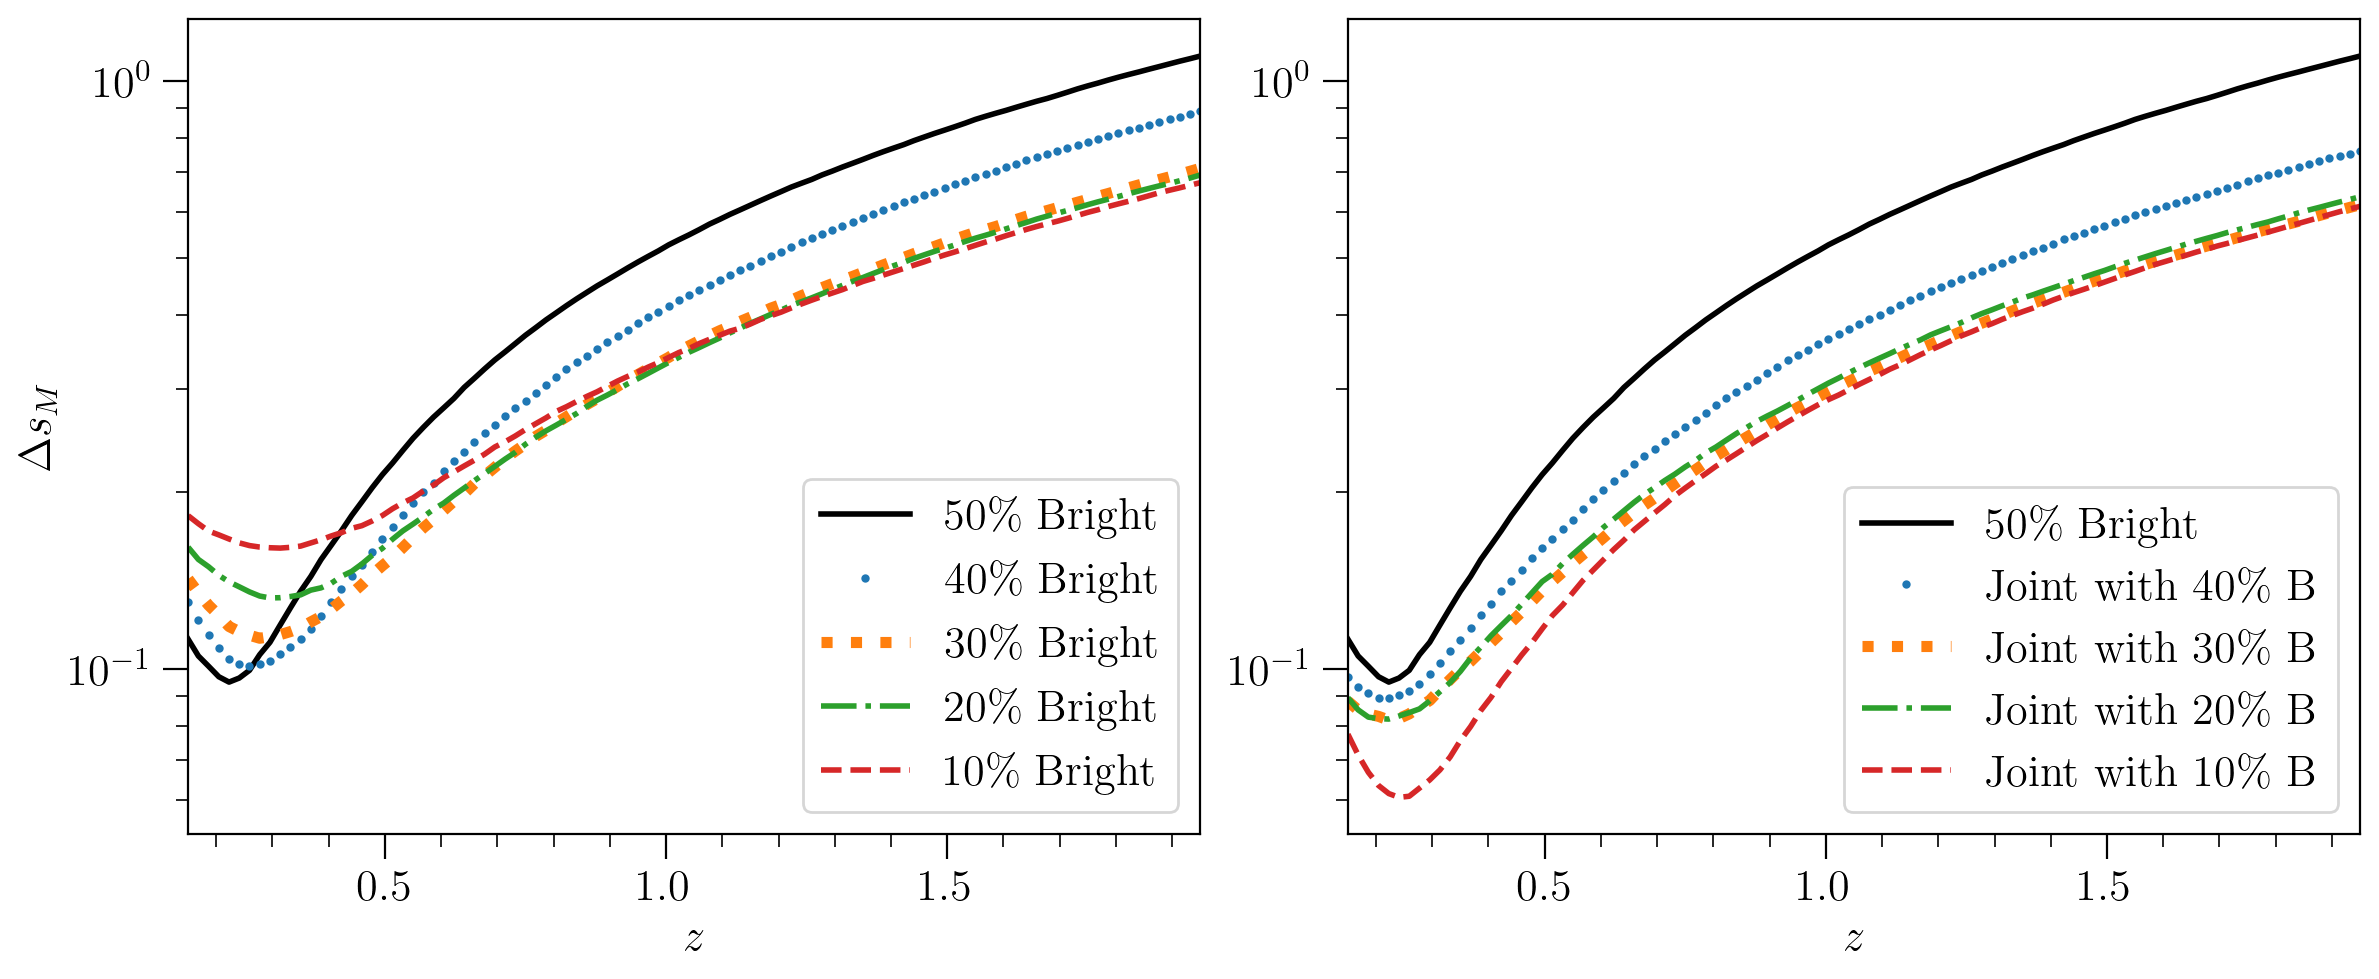

In [42]:
# Set the global parameters for the plots
plt.rcParams.update(params)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1
axs[0].plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sM_50'], label='$50\%$ Bright', color='black', linewidth=2.0)
axs[0].plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sM_40'], '.',label='$40\%$ Bright', markersize=4.0)
axs[0].plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sM_30'], ':', label='$30\%$ Bright', linewidth=4.0)
axs[0].plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sM_20'], '-.', label='$20\%$ Bright', linewidth=2.0)
axs[0].plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sM_10'], '--', label='$10\%$ Bright', linewidth=2.0)

axs[0].set_xlim(0.15, 1.95)

axs[0].set_xlabel('$z$')
axs[0].set_ylabel('$\Delta s_M$')
axs[0].legend()
#axs[0].set_title('Size of the error bars for single splits')
axs[0].set_yscale('log')

# Plot 2
axs[1].plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sM_50'], label='$50\%$ Bright', color='black', linewidth=2.0)
axs[1].plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['sM_Joint'], '.', label='Joint with $40\%$ B', markersize=4.0)
axs[1].plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['sM_Joint'], ':', label='Joint with $30\%$ B', linewidth=4.0)
axs[1].plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['sM_Joint'], '-.',label='Joint with $20\%$ B', linewidth=2.0)
axs[1].plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['sM_Joint'], '--',label='Joint with $10\%$ B', linewidth=2.0)

axs[1].set_xlim(0.15, 1.95)

axs[1].set_xlabel('$z$')
#axs[1].set_title('Size of the error bars as a function of $m\'$')
axs[1].set_yscale('log')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Set the y-axis limits to be the same for both plots
axs[0].set_ylim(axs[1].get_ylim())

# Show the plot
plt.show()

fig.savefig('plots/widths_errorbars_sM.pdf', bbox_inches='tight')

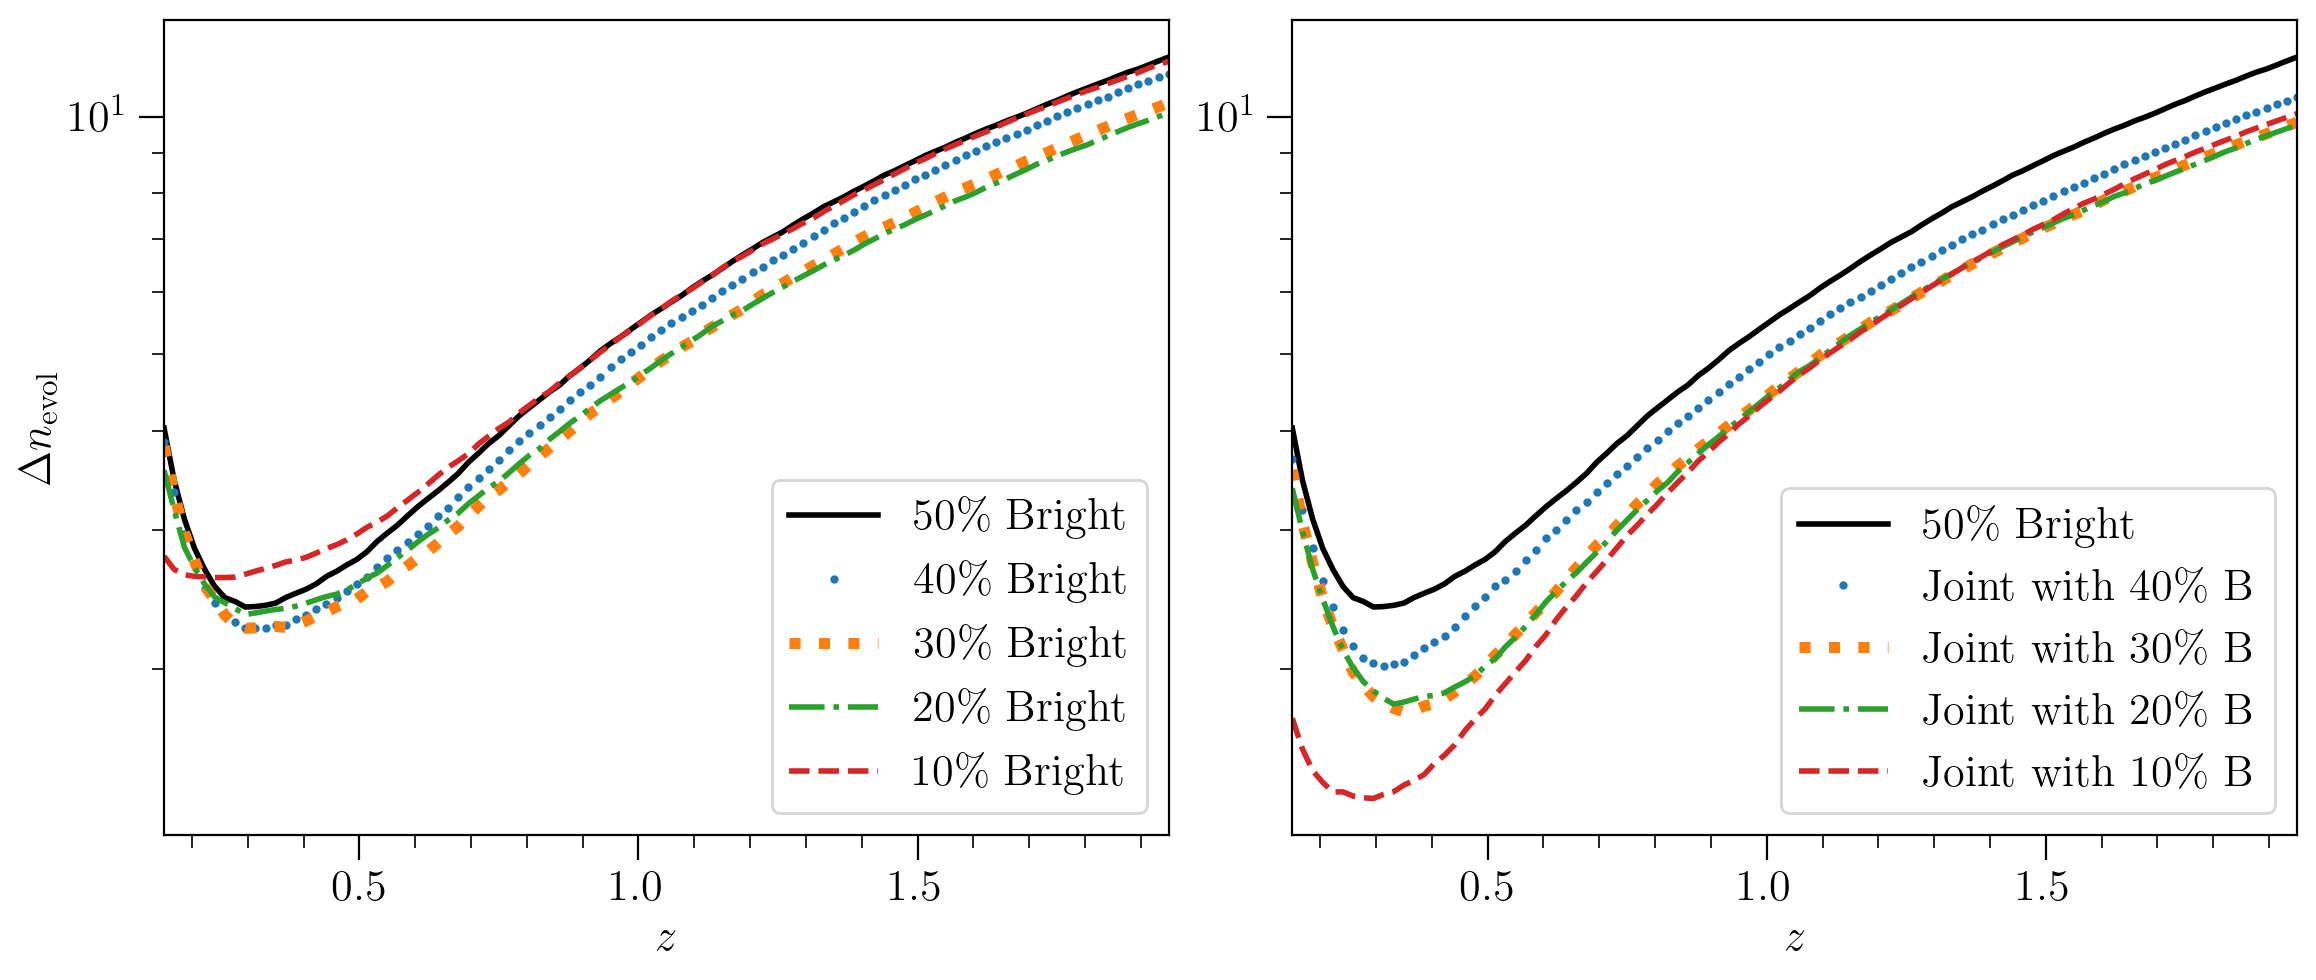

In [43]:
# Set the global parameters for the plots
plt.rcParams.update(params)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1
axs[0].plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_50'], label='$50\%$ Bright', color='black', linewidth=2.0)
axs[0].plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['nevol_40'], '.',label='$40\%$ Bright', markersize=4.0)
axs[0].plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['nevol_30'], ':', label='$30\%$ Bright', linewidth=4.0)
axs[0].plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['nevol_20'], '-.', label='$20\%$ Bright', linewidth=2.0)
axs[0].plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_10'], '--', label='$10\%$ Bright', linewidth=2.0)

axs[0].set_xlim(0.15, 1.95)

axs[0].set_xlabel('$z$')
axs[0].set_ylabel('$\Delta n_{\mathrm{evol}}$')
axs[0].legend(loc='lower right')
#axs[0].set_title('Size of the error bars for single splits')
axs[0].set_yscale('log')

# Plot 2
axs[1].plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_50'], label='$50\%$ Bright', color='black', linewidth=2.0)
axs[1].plot(widths_data['widths_Joint_50x40.pkl']['z'], widths_data['widths_Joint_50x40.pkl']['nevol_Joint'], '.', label='Joint with $40\%$ B', markersize=4.0)
axs[1].plot(widths_data['widths_Joint_50x30.pkl']['z'], widths_data['widths_Joint_50x30.pkl']['nevol_Joint'], ':', label='Joint with $30\%$ B', linewidth=4.0)
axs[1].plot(widths_data['widths_Joint_50x20.pkl']['z'], widths_data['widths_Joint_50x20.pkl']['nevol_Joint'], '-.',label='Joint with $20\%$ B', linewidth=2.0)
axs[1].plot(widths_data['widths_Joint_50x10.pkl']['z'], widths_data['widths_Joint_50x10.pkl']['nevol_Joint'], '--',label='Joint with $10\%$ B', linewidth=2.0)

axs[1].set_xlim(0.15, 1.95)

axs[1].set_xlabel('$z$')
#axs[1].set_title('Size of the error bars as a function of $m\'$')
axs[1].set_yscale('log')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Set the y-axis limits to be the same for both plots
axs[0].set_ylim(axs[1].get_ylim())

# Show the plot
plt.show()

fig.savefig('plots/widths_errorbars_nevol.pdf', bbox_inches='tight')